# 投资策略-step1

In [19]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Use 'prophet' instead of 'fbprophet'
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

In [20]:
from tensorflow import keras


In [21]:
from sklearn.preprocessing import MinMaxScaler


In [22]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [23]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler  # Important import for LSTM

In [24]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as web

# Define the start and end dates
end = datetime.datetime.today()
start = end - datetime.timedelta(days=3*365)  # Approximate 3 years

# Define a function to fetch data from FRED
def fetch_fred_data(symbol):
    try:
        data = web.DataReader(symbol, 'fred', start, end)
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching {symbol} from FRED: {e}")
        return pd.DataFrame()

# Custom fetch for certain indicators that may not work through FRED
def fetch_custom_data(url):
    try:
        response = requests.get(url)
        data = pd.read_csv(io.StringIO(response.text), parse_dates=['DATE'], index_col='DATE')
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching custom data: {e}")
        return pd.DataFrame()

# URLs for custom data
urls = {
    'VIX': 'https://raw.githubusercontent.com/plotly/datasets/master/vix.csv',
}

# Retrieve data for the indicators
indicators = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index
    'PPI': 'PPIACO',    # Producer Price Index
    'Federal Reserve Rate': 'FEDFUNDS',  # Federal Funds Rate
    'Treasury Yields': 'GS10',            # 10-Year Treasury Yield
    'NFP': 'PAYEMS',                      # Non-Farm Payrolls
    'Initial Jobless Claims': 'IC4WSA',  # Initial Jobless Claims
    'Consumer Confidence Index': 'UMCSENT',  # Consumer Confidence
    'Retail Sales Data': 'RSAFS',        # Retail Sales
    'PMI': 'IPMAN',                        # PMI
    'Housing Starts': 'HOUST',            # Housing Starts
    'VIX': '^VIX',                        # Volatility Index
    'PCE': 'PCE'                          # Personal Consumption Expenditures
}

# Create a dictionary to hold the data
data_frames = {}

# Fetch each indicator
for name, symbol in indicators.items():
    if symbol in urls:  # For custom URLs
        data = fetch_custom_data(urls[symbol])
    elif symbol.startswith('^'):  # For stock/market indices, use yfinance
        data = yf.download(symbol, start=start, end=end)['Close']
        data.index = pd.to_datetime(data.index)  # Ensure the index is a DatetimeIndex
        data = data.resample('M').mean()  # Resample to monthly
    else:  # For economic indicators, use FRED
        data = fetch_fred_data(symbol)

    if not data.empty:  # Only add non-empty DataFrames
        data_frames[name] = data

# Combine all data into a single DataFrame
combined_data = pd.concat(data_frames.values(), axis=1)
combined_data.columns = data_frames.keys()

# Display the combined DataFrame
print(combined_data.tail())


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9

                CPI      PPI  Federal Reserve Rate  Treasury Yields       NFP  \
DATE                                                                            
2024-05-31  313.225  255.453                  5.33             4.48  158430.0   
2024-06-30  313.049  256.015                  5.33             4.31  158548.0   
2024-07-31  313.534  257.485                  5.33             4.25  158692.0   
2024-08-31  314.121  255.613                  5.33             3.87  158851.0   
2024-09-30      NaN      NaN                  5.13             3.72  159105.0   

            Initial Jobless Claims  Consumer Confidence Index  \
DATE                                                            
2024-05-31                219062.5                       69.1   
2024-06-30                231500.0                       68.2   
2024-07-31                235687.5                       66.4   
2024-08-31                235200.0                       67.9   
2024-09-30                227125.0        

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data


In [25]:
# Import additional libraries
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from tensorflow.keras import layers

# Fill NaNs with interpolation or forward fill
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for linear regression
X = np.arange(len(combined_data)).reshape(-1, 1)  # Time variable
forecasts = {}

for col in combined_data.columns:
    model = LinearRegression()
    model.fit(X, combined_data[col])
    future_X = np.arange(len(combined_data), len(combined_data) + 12).reshape(-1, 1)
    forecasts[col] = model.predict(future_X)

def moving_average(data, window):
    return data.rolling(window=window).mean()

sma_forecasts = {}
for col in combined_data.columns:
    sma_forecasts[col] = moving_average(combined_data[col], window=12).iloc[-1]  # Last SMA value

from sklearn.ensemble import RandomForestRegressor

rf_forecasts = {}
for col in combined_data.columns:
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X, combined_data[col])
    rf_forecasts[col] = model.predict(future_X)

from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_forecasts = {}
for col in combined_data.columns:
    # Reshape data for LSTM
    data = combined_data[col].values.reshape(-1, 1)
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(data.shape[0], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Prepare the data for LSTM
    data = data.reshape((len(data), 1, 1))
    model.fit(data[:-12], data[12:], epochs=200, verbose=0)
    
    # Forecasting
    lstm_forecasts[col] = model.predict(data[-12:].reshape((1, 12, 1))).flatten()


final_forecast = {}

# Assuming equal weights for simplicity
for col in combined_data.columns:
    final_forecast[col] = (forecasts[col] + sma_forecasts[col] + rf_forecasts[col] + lstm_forecasts[col]) / 4



# Convert to DataFrame for easier viewing
final_forecast_df = pd.DataFrame(final_forecast, index=pd.date_range(start=combined_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))
print(final_forecast_df)

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/3475863114.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


KeyboardInterrupt: 

In [11]:
# Define major industry indices symbols
industry_indices = {
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI',
    'NASDAQ': '^IXIC',
    'Russell 2000': '^RUT',
    'Financials': 'XLF',
    'Healthcare': 'XLV',
    'Technology': 'XLK',
    'Communication': 'XLC',
    'Consumer Staple': 'XLP',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Real Estate': 'XLRE',
    'Energy':'XLE',
    'Utilities':'XLU',
    'Consumer Discretionary': 'XLY',
    'Gold':'GLD',
    'Long China' : 'MCHI',
    'Crude oil' : 'USO',
    'military': 'ITA'
}

# Fetch industry indices data
for name, symbol in industry_indices.items():
    data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
    if not data.empty:
        data_frames[name] = data

# Combine all data into a single DataFrame again
#industry_data = pd.concat(data_frames.values(), axis=1)
#industry_data.columns = data_frames.keys()

# Display the updated combined DataFrame
#print(industry_data.tail())


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_46958/1775380162.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [9]:
# Combine industry indices into the existing combined_data
for name, data in data_frames.items():
    combined_data[name] = data

# Drop NaNs by forward filling or interpolation
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/2630337843.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


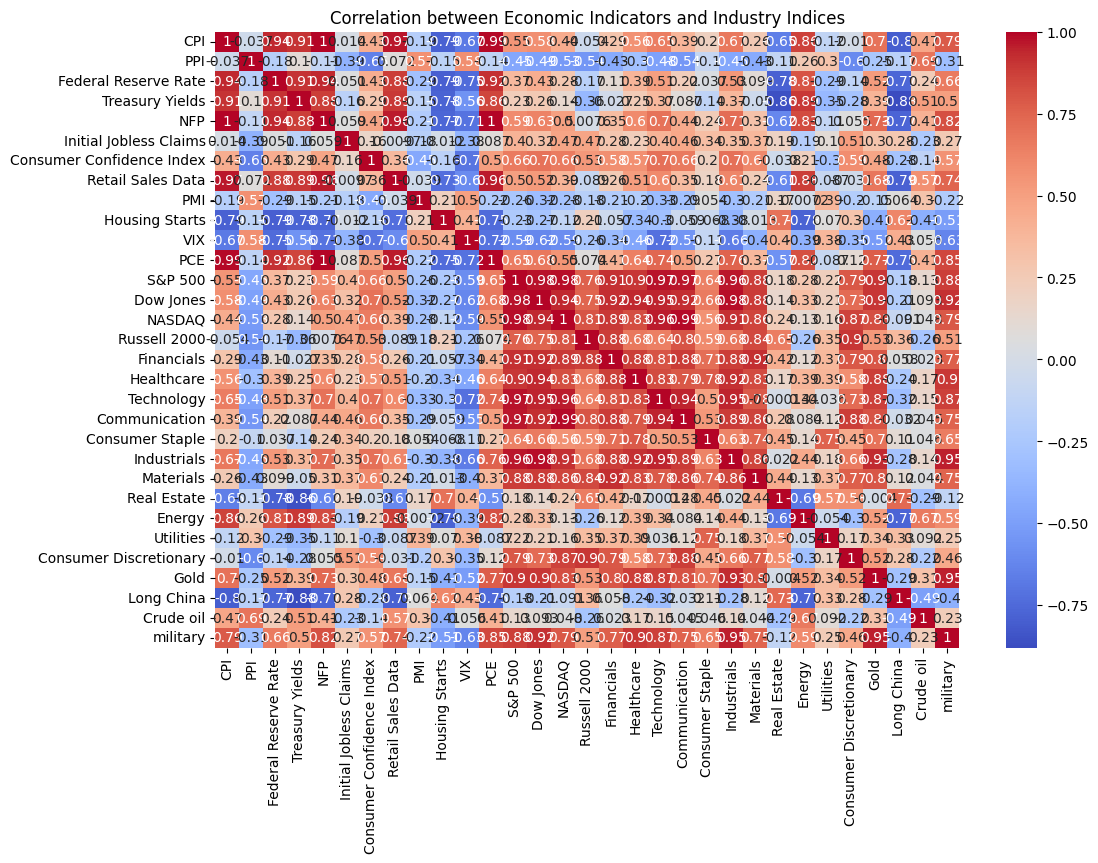

S&P 500 R^2 score: -8.83083954766908
Dow Jones R^2 score: -18.73739224717645
NASDAQ R^2 score: -1.0908503228114035
Russell 2000 R^2 score: -18.960686518211915
Financials R^2 score: -29.35429009311268
Healthcare R^2 score: -37.70767090784809
Technology R^2 score: 0.3801985823222185
Communication R^2 score: 0.24283615130241654
Consumer Staple R^2 score: -28.606064941556728
Industrials R^2 score: -20.725405937827425
Materials R^2 score: -79.69254179665961
Real Estate R^2 score: -5.306656902536149
Energy R^2 score: -59.99403787360519
Utilities R^2 score: -6.375901562630942
Consumer Discretionary R^2 score: -1.8871061923444912
Gold R^2 score: -2.6767508522068293
Long China R^2 score: -0.660361090596294
Crude oil R^2 score: 0.05227636105007061
military R^2 score: -6.431068490332359


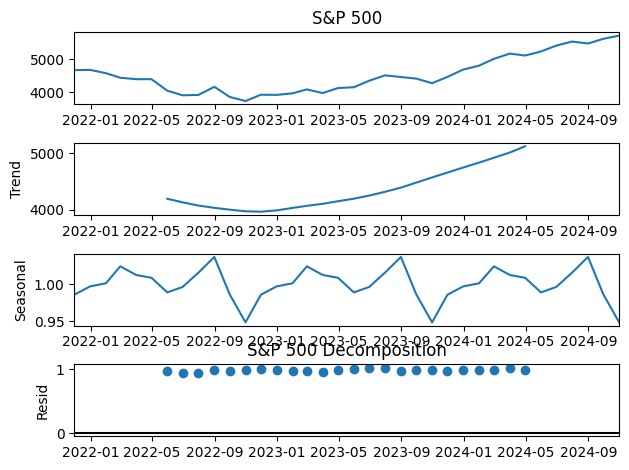

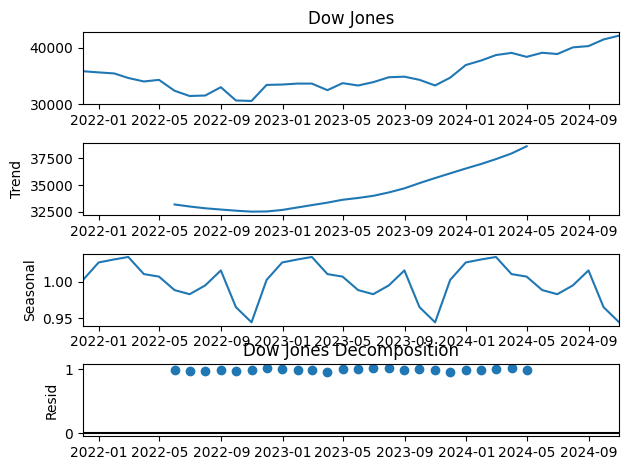

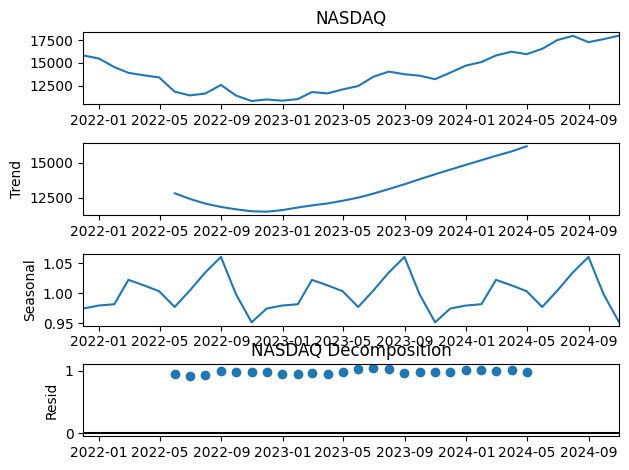

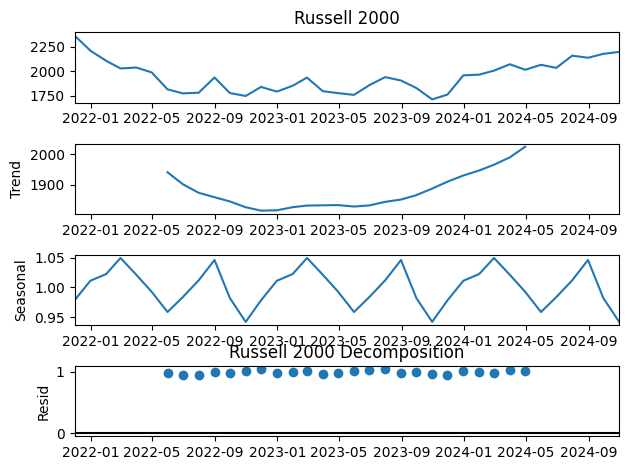

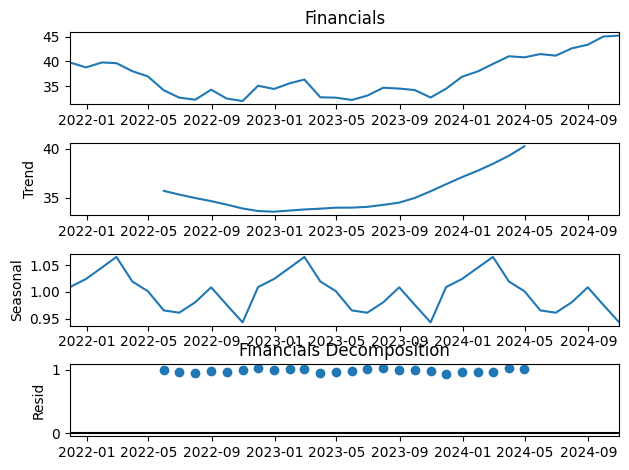

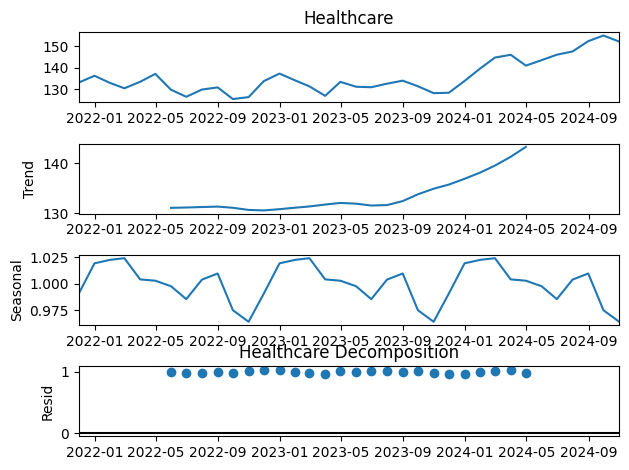

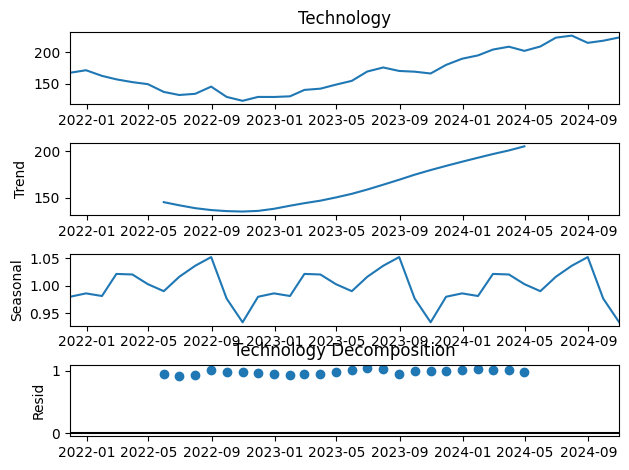

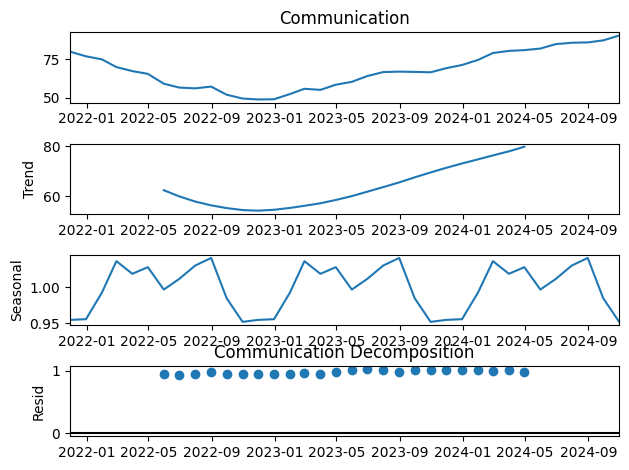

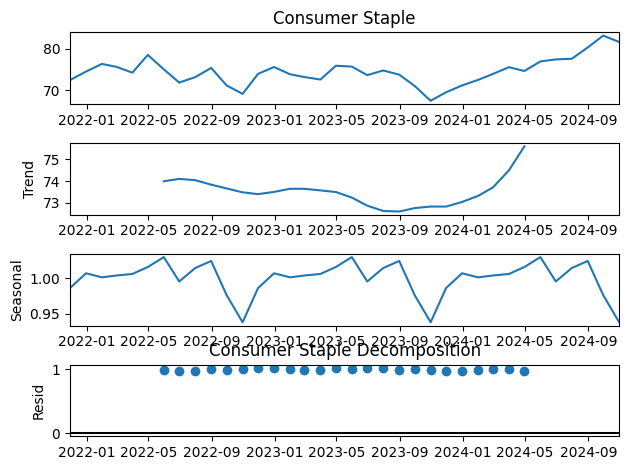

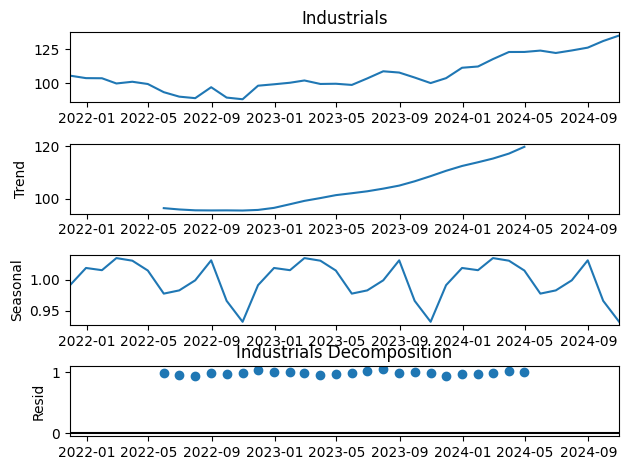

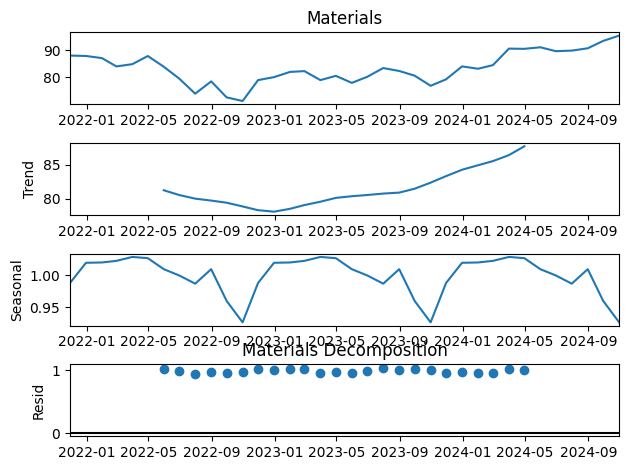

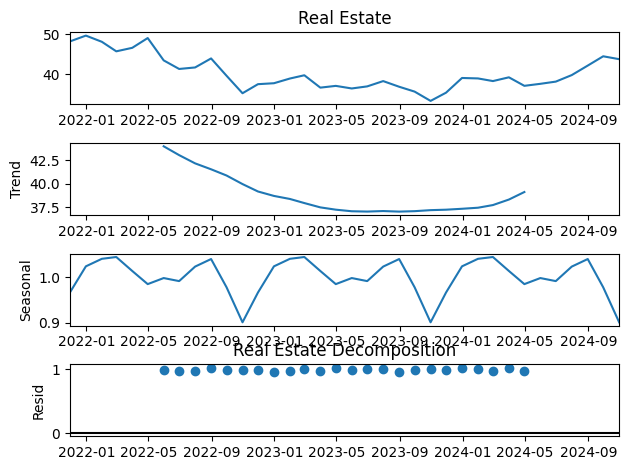

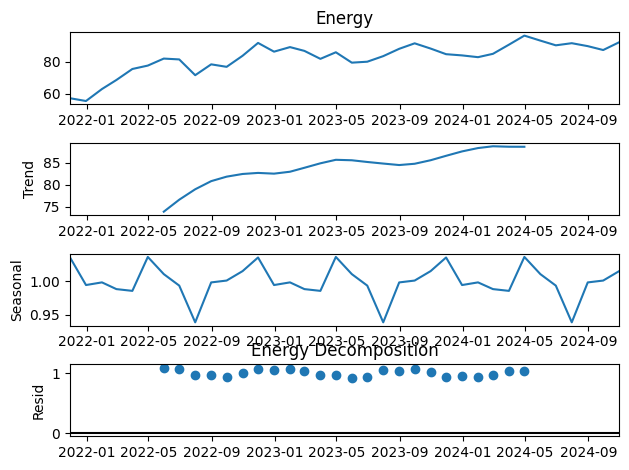

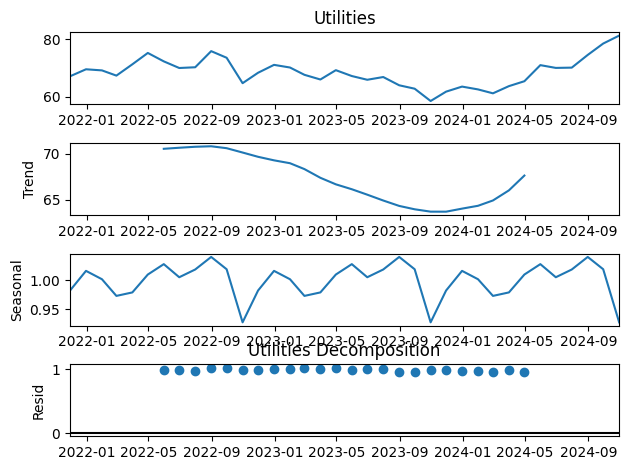

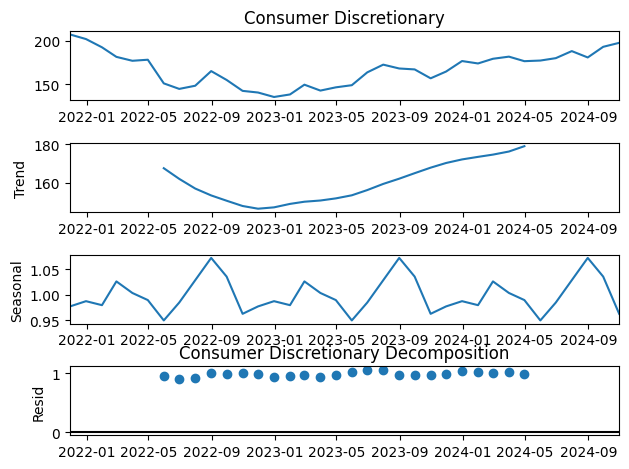

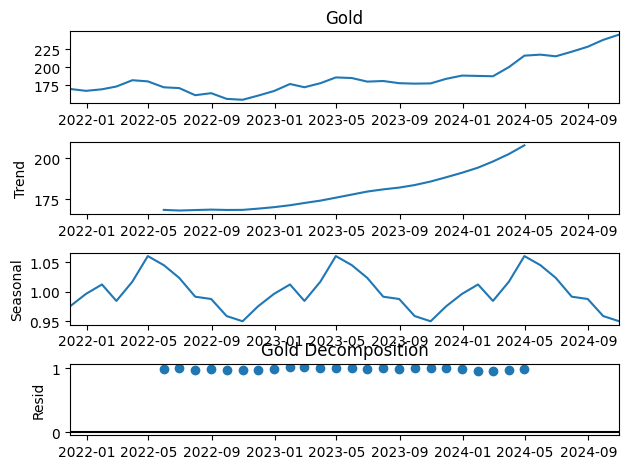

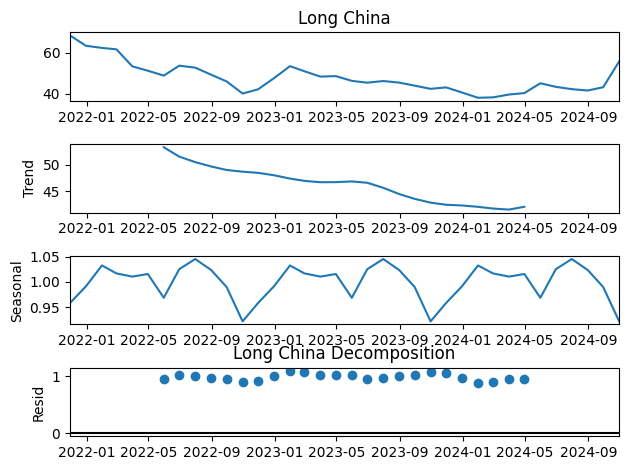

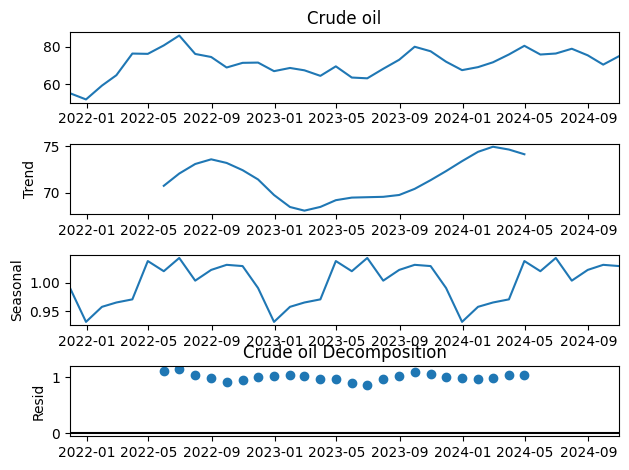

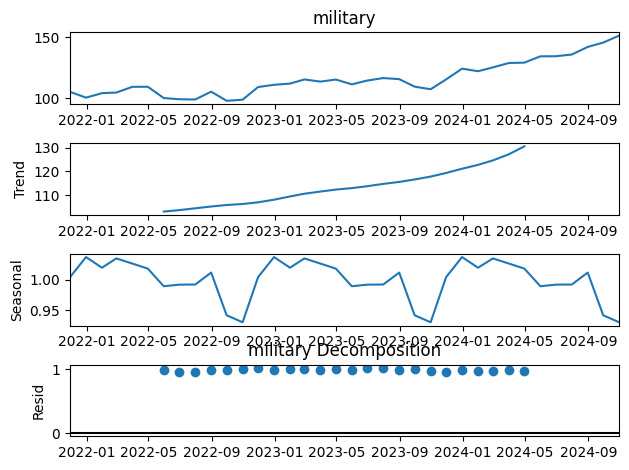

Granger Causality for S&P 500
CPI: p-values = [0.3644, 0.2049]
PPI: p-values = [0.7803, 0.3625]
Federal Reserve Rate: p-values = [0.0, 0.0558]
Treasury Yields: p-values = [0.6482, 0.4838]
NFP: p-values = [0.6996, 0.2595]
Initial Jobless Claims: p-values = [0.2205, 0.5655]
Consumer Confidence Index: p-values = [0.3571, 0.0019]
Retail Sales Data: p-values = [0.3088, 0.0796]
PMI: p-values = [0.3747, 0.0121]
Housing Starts: p-values = [0.551, 0.9227]
VIX: p-values = [0.1122, 0.0957]
PCE: p-values = [0.9193, 0.8751]
Granger Causality for Dow Jones
CPI: p-values = [0.3127, 0.1666]
PPI: p-values = [0.9059, 0.4296]
Federal Reserve Rate: p-values = [0.0, 0.0331]
Treasury Yields: p-values = [0.5642, 0.9495]
NFP: p-values = [0.6001, 0.4158]
Initial Jobless Claims: p-values = [0.2835, 0.5619]
Consumer Confidence Index: p-values = [0.1429, 0.0177]
Retail Sales Data: p-values = [0.3407, 0.0115]
PMI: p-values = [0.2041, 0.0059]
Housing Starts: p-values = [0.4517, 0.8815]
VIX: p-values = [0.1688, 0.31

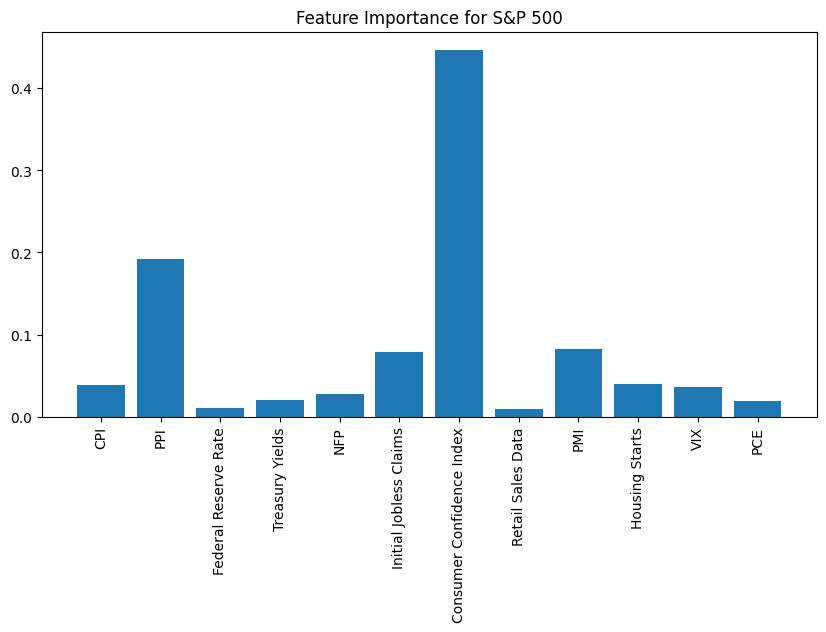

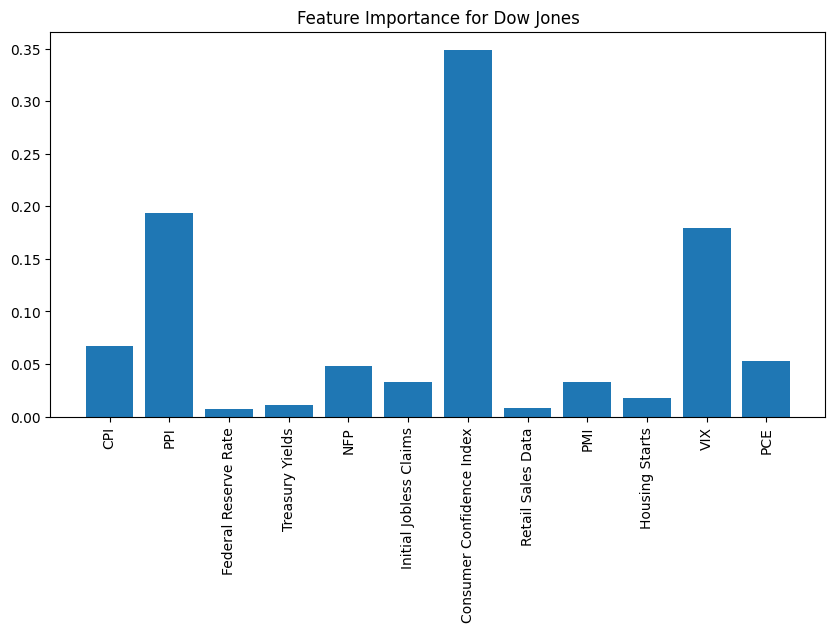

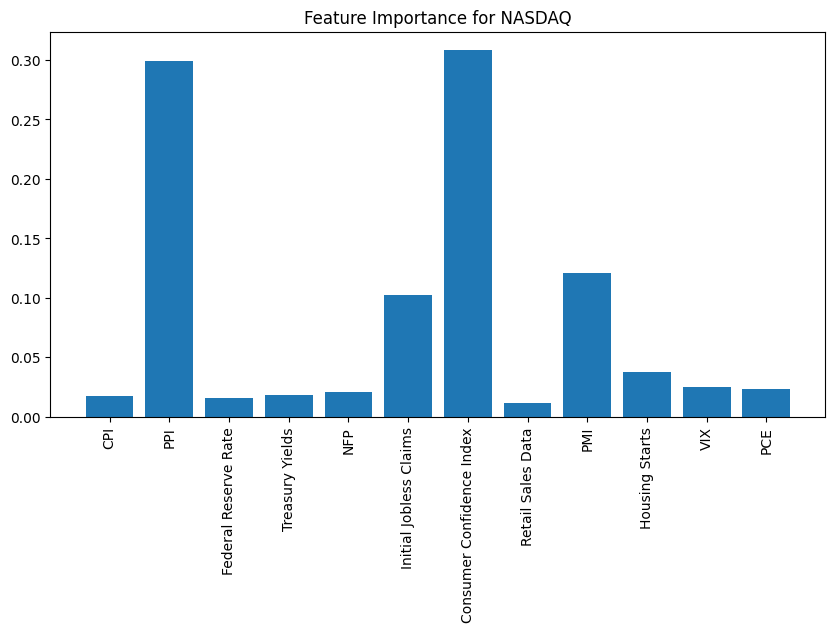

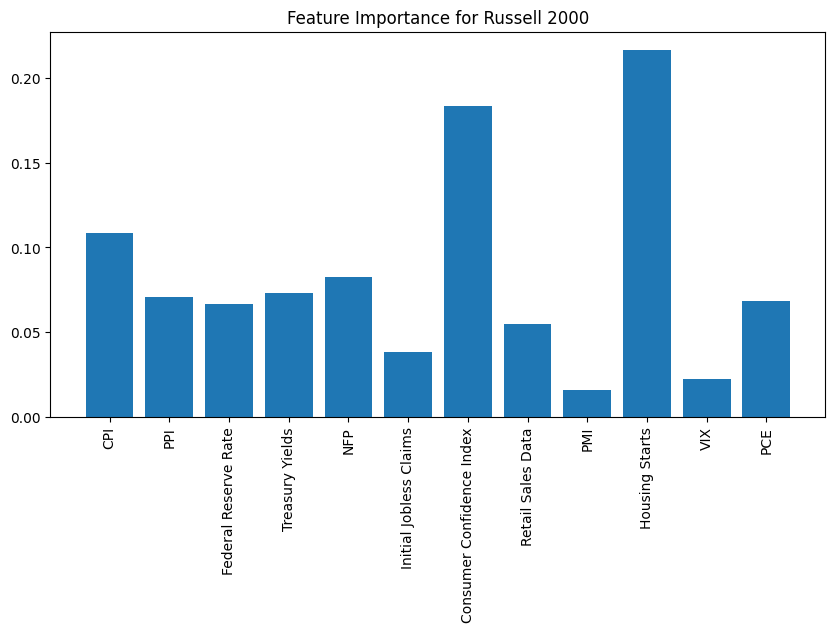

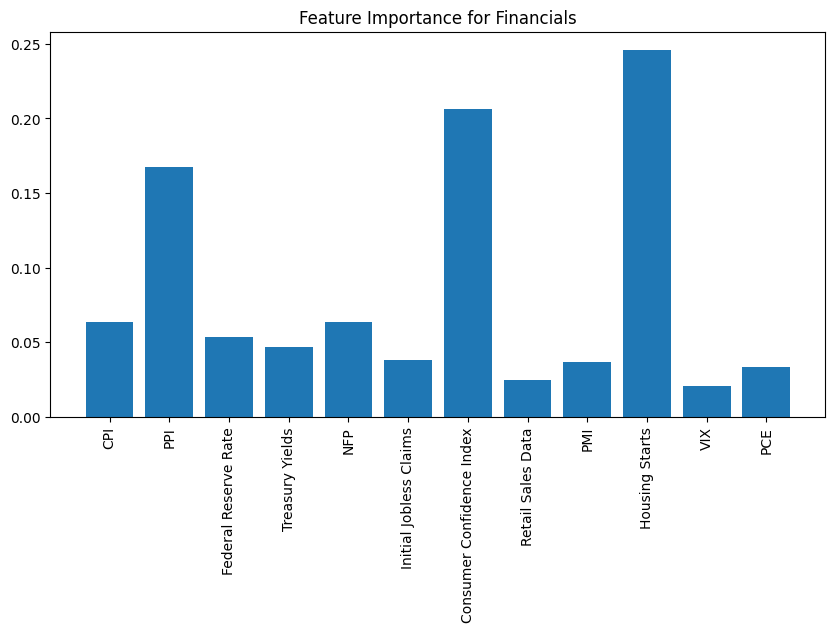

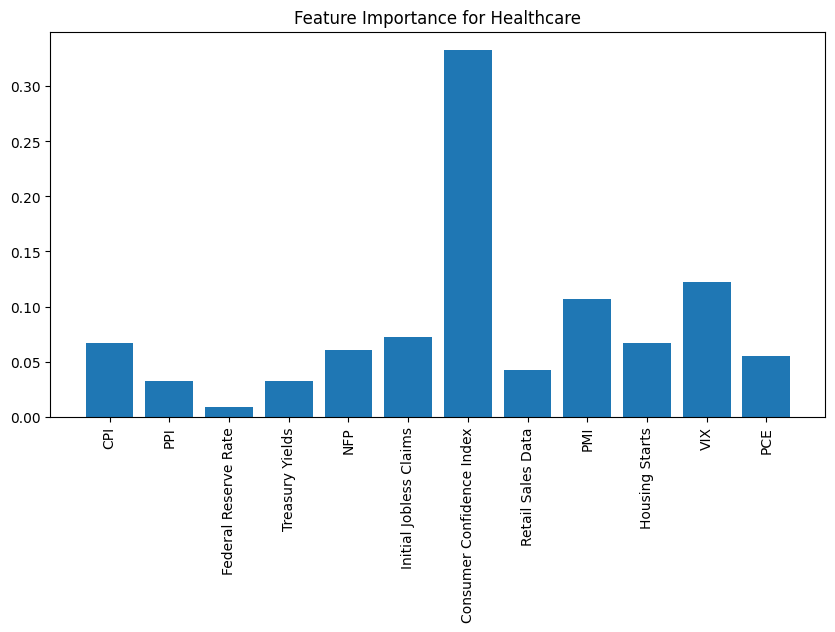

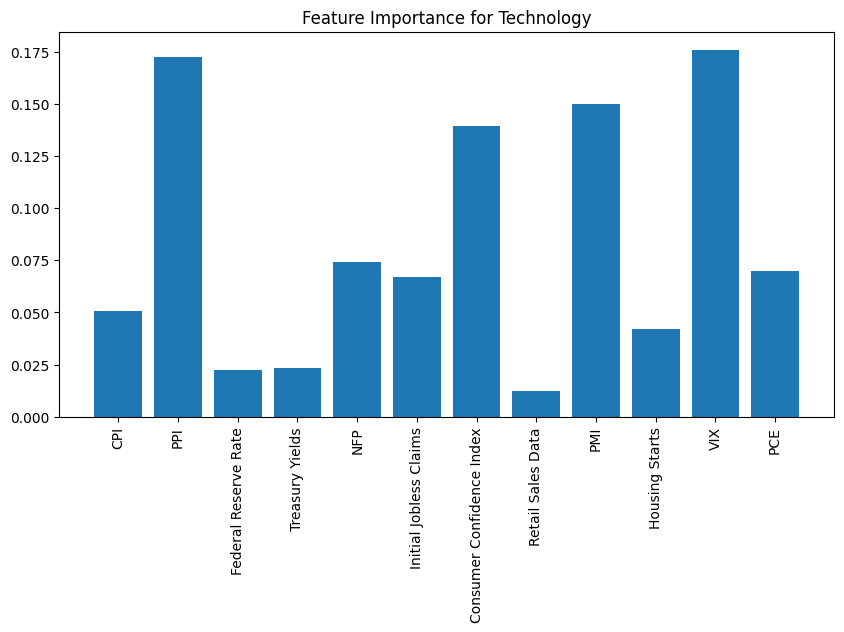

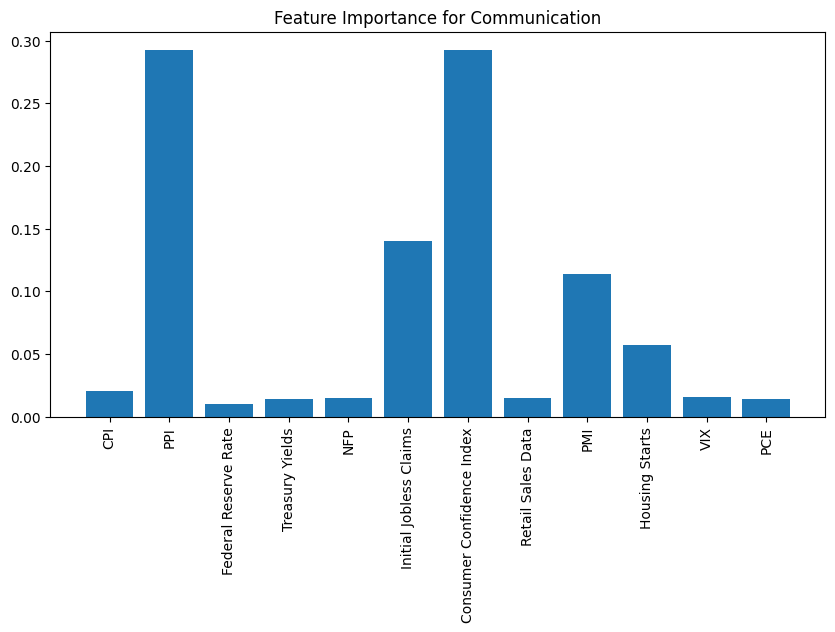

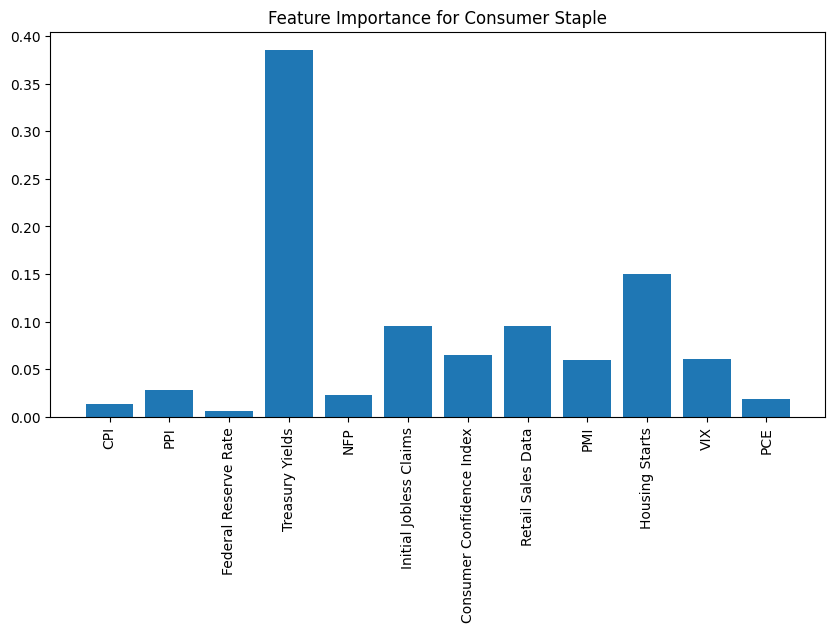

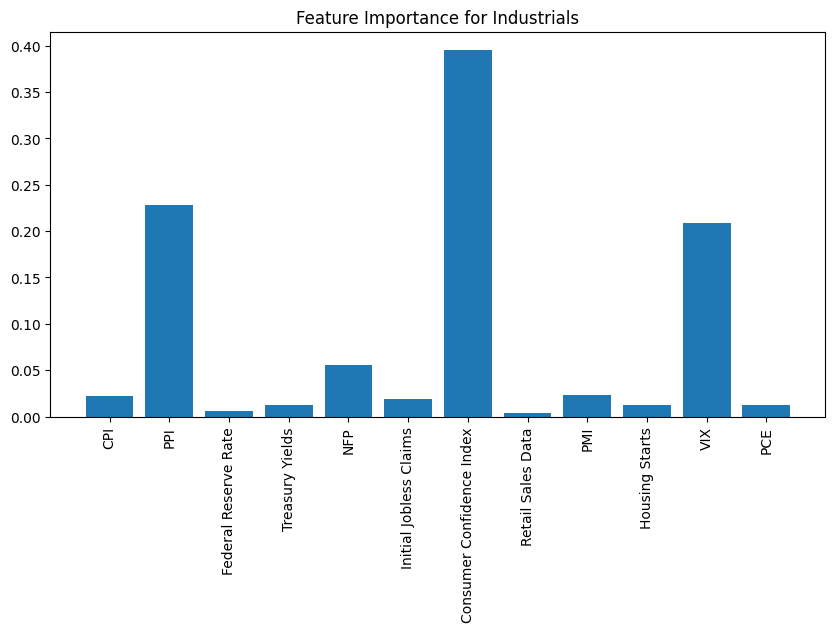

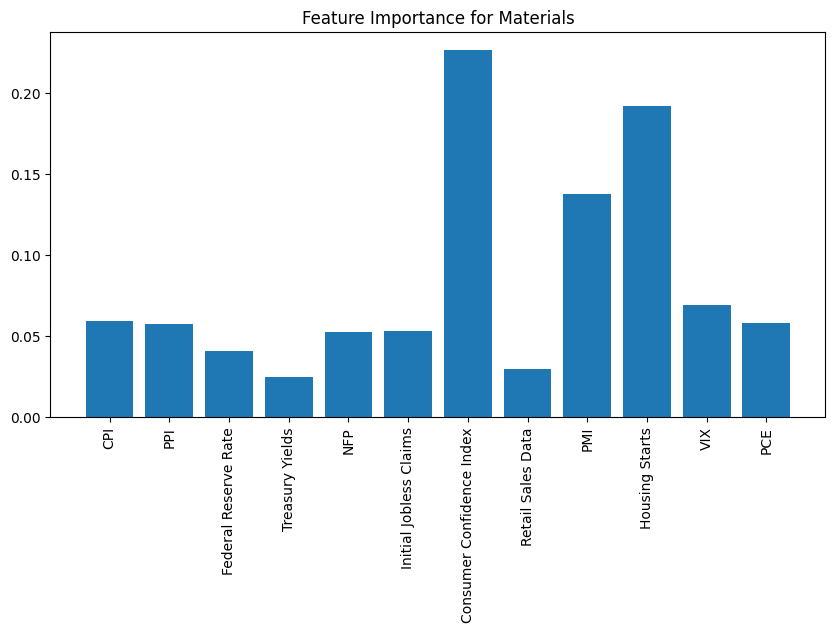

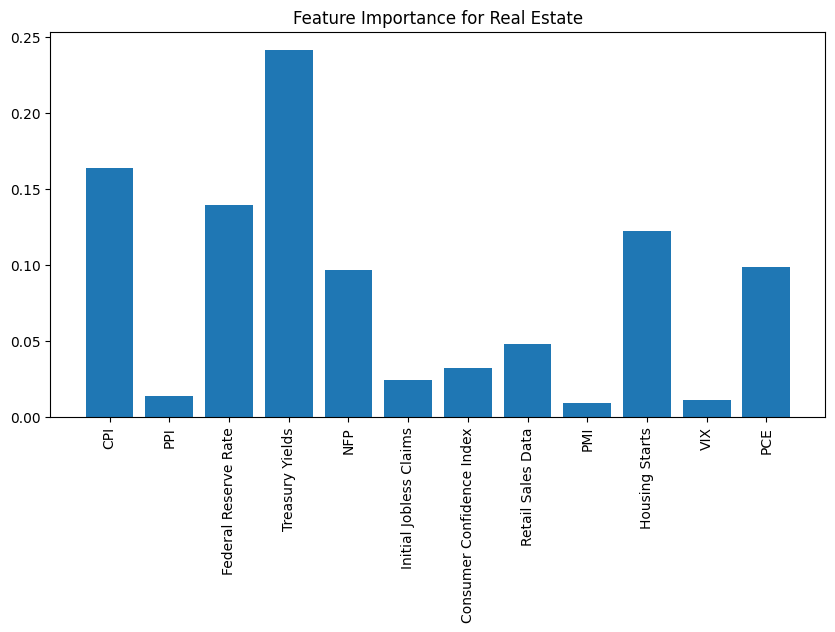

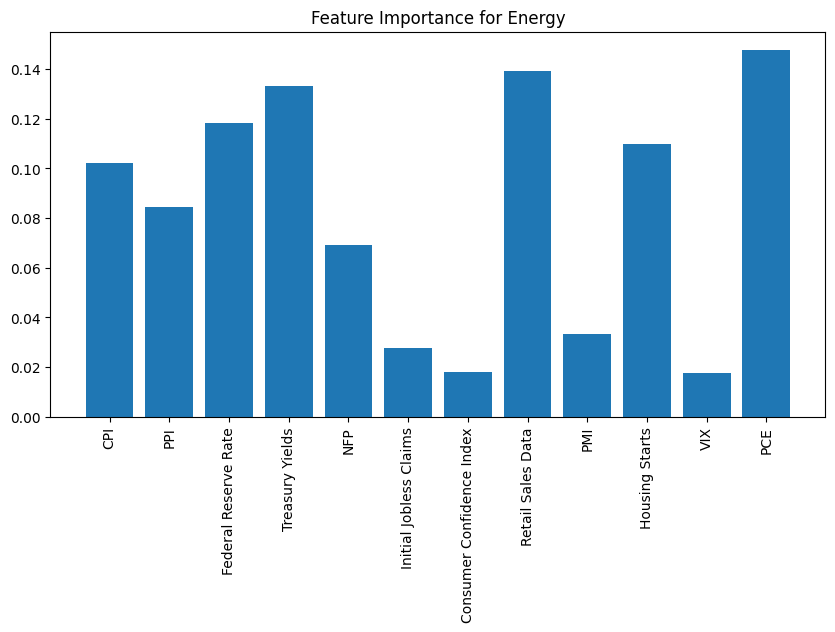

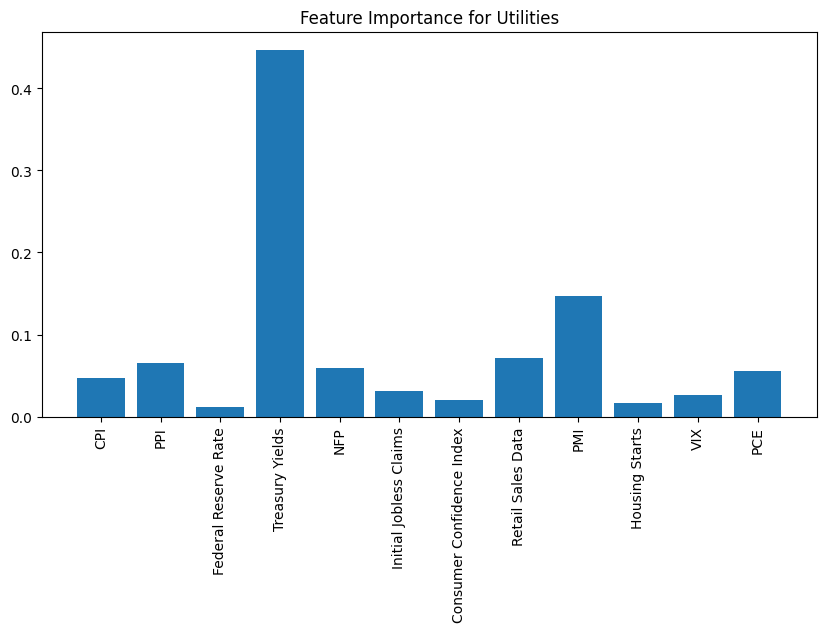

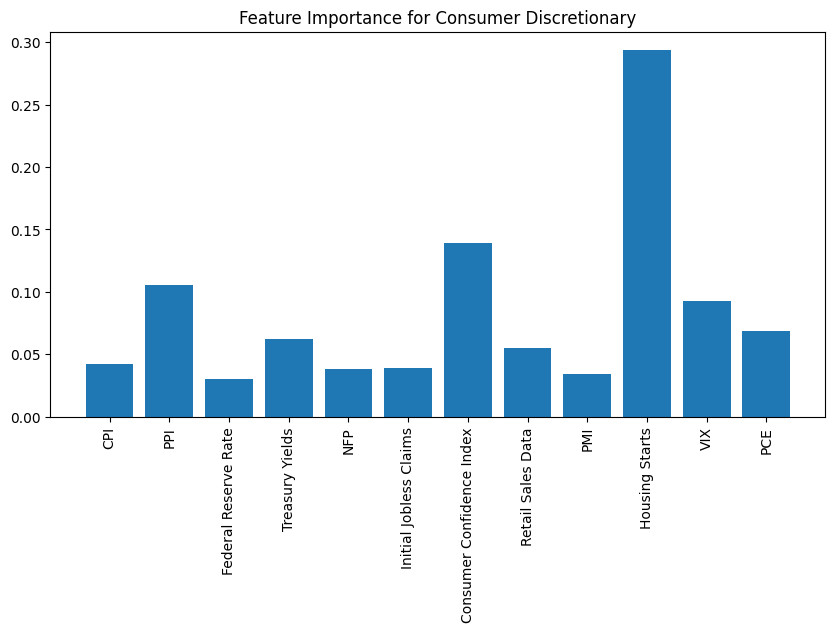

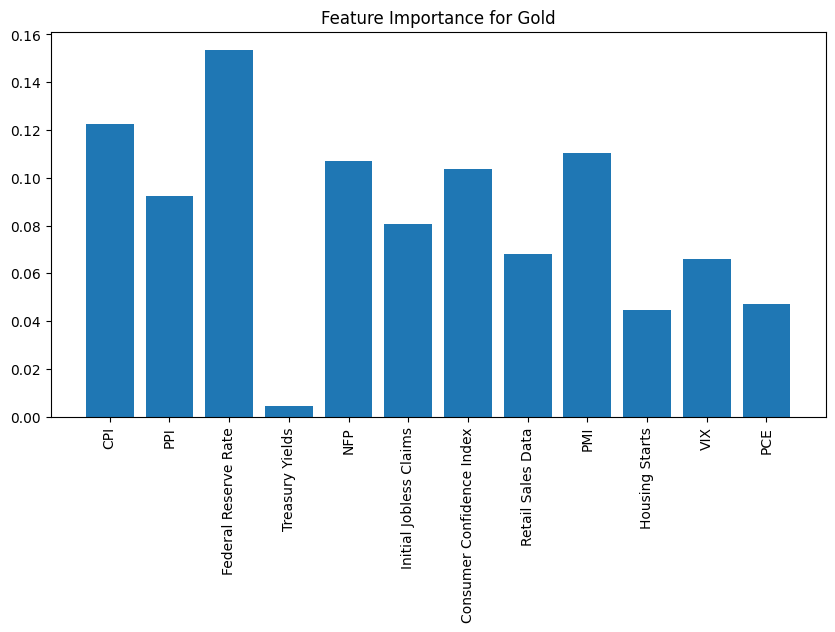

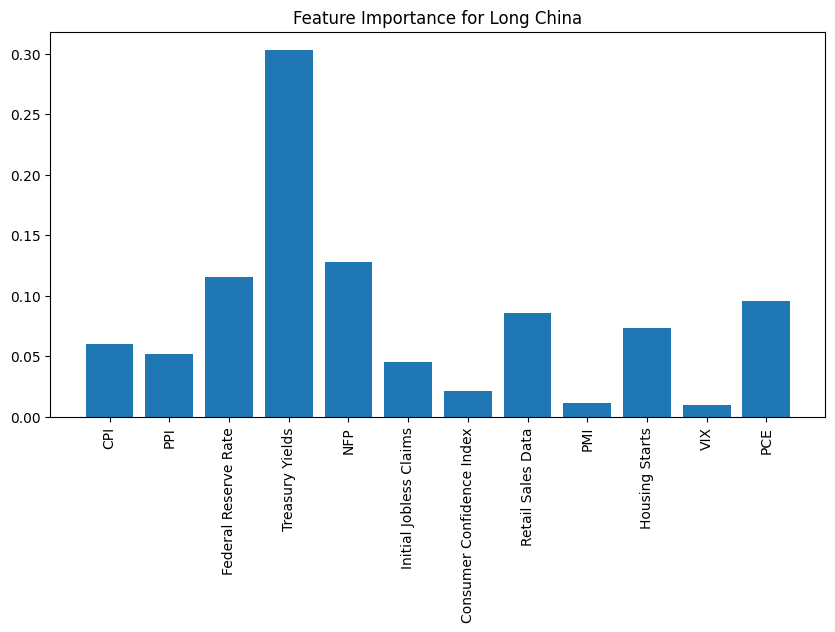

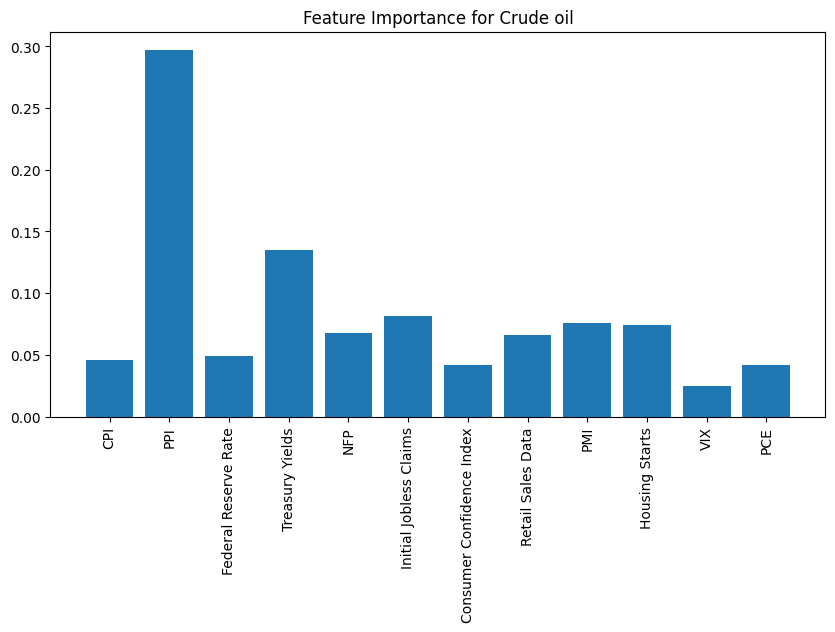

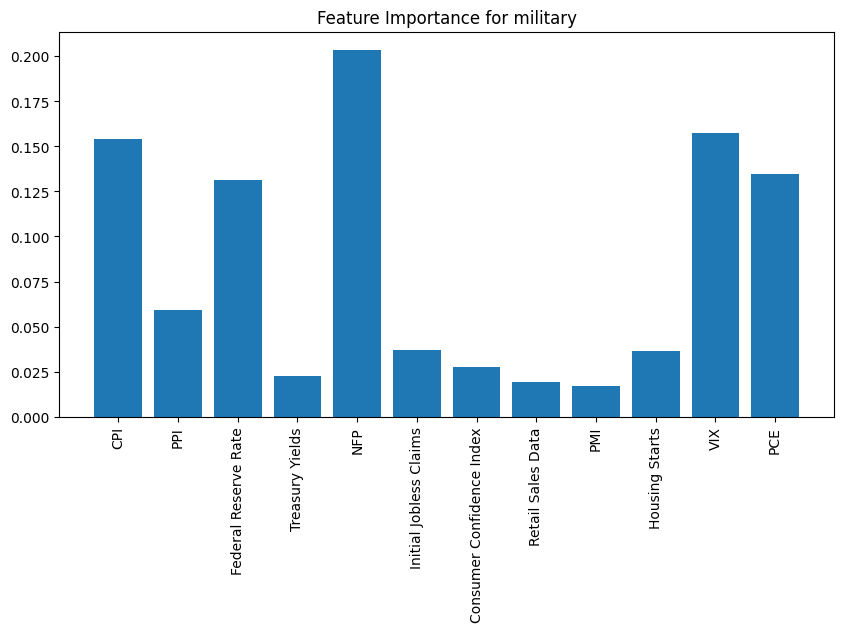

Top 3 promising industries: ['Technology', 'Communication', 'Crude oil', 'Long China', 'NASDAQ']


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = combined_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Economic Indicators and Industry Indices')
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

industry_forecast_results = {}
X = combined_data[indicators.keys()]  # Economic indicators
for industry in industry_indices.keys():
    y = combined_data[industry]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store R^2 score
    r2 = r2_score(y_test, y_pred)
    industry_forecast_results[industry] = r2
    print(f"{industry} R^2 score: {r2}")

from statsmodels.tsa.seasonal import seasonal_decompose

for industry in industry_indices.keys():
    result = seasonal_decompose(combined_data[industry], model='multiplicative', period=12)
    result.plot()
    plt.title(f'{industry} Decomposition')
    plt.show()

from statsmodels.tsa.stattools import grangercausalitytests

for industry in industry_indices.keys():
    print(f"Granger Causality for {industry}")
    for indicator in indicators.keys():
        test = grangercausalitytests(combined_data[[indicator, industry]], maxlag=2, verbose=False)
        p_values = [round(test[i+1][0]['ssr_chi2test'][1], 4) for i in range(2)]
        print(f'{indicator}: p-values = {p_values}')


from sklearn.ensemble import RandomForestRegressor
import numpy as np

feature_importance_results = {}

for industry in industry_indices.keys():
    y = combined_data[industry]
    X = combined_data[indicators.keys()]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(X_train, y_train)
    
    # Get feature importance
    importances = rf_model.feature_importances_
    feature_importance_results[industry] = dict(zip(X.columns, importances))
    
    # Plot feature importances
    plt.figure(figsize=(10, 5))
    plt.bar(X.columns, importances)
    plt.title(f'Feature Importance for {industry}')
    plt.xticks(rotation=90)
    plt.show()

# Rank industries based on regression R² score and feature importance
ranked_industries = sorted(industry_forecast_results.items(), key=lambda x: x[1], reverse=True)

# Select top 3 industries
top_3_industries = [industry for industry, score in ranked_industries[:5]]
print(f"Top 3 promising industries: {top_3_industries}")


https://stockanalysis.com/stocks/sector/technology/

https://www.sectorspdrs.com/mainfund/XLK

https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Institutional&ticker=PGJ

In [11]:
import pandas as pd

# Load the CSV file
file_path = 'portfolio-holdings-xlk.csv'

# Read the CSV file, assuming that the file has the columns starting from row 2
df = pd.read_csv(file_path, skiprows=1)

# Extract the 'Symbol' column and save it as a list
tickers = df['Symbol'].dropna().tolist()

# Display the list of tickers
tickers


['AAPL',
 'MSFT',
 'NVDA',
 'AVGO',
 'CRM',
 'AMD',
 'ORCL',
 'ACN',
 'ADBE',
 'CSCO',
 'IBM',
 'NOW',
 'QCOM',
 'TXN',
 'INTU',
 'AMAT',
 'ADI',
 'MU',
 'PANW',
 'LRCX',
 'KLAC',
 'ANET',
 'INTC',
 'PLTR',
 'SNPS',
 'MSI',
 'APH',
 'CDNS',
 'CRWD',
 'NXPI',
 'ROP',
 'ADSK',
 'FTNT',
 'FICO',
 'MPWR',
 'TEL',
 'MCHP',
 'IT',
 'CTSH',
 'HPQ',
 'GLW',
 'DELL',
 'ON',
 'CDW',
 'ANSS',
 'HPE',
 'KEYS',
 'NTAP',
 'FSLR',
 'TYL',
 'STX',
 'TER',
 'PTC',
 'GDDY',
 'WDC',
 'SMCI',
 'TDY',
 'ZBRA',
 'VRSN',
 'TRMB',
 'AKAM',
 'SWKS',
 'GEN',
 'ENPH',
 'JBL',
 'JNPR',
 'FFIV',
 'EPAM',
 'QRVO']

In [64]:
tickers = [
    'COP', 'EOG', 'CNQ', 'FANG', 'OXY', 'HES', 'WDS', 'DVN', 'TPL', 'EQT', 'CTRA', 'MRO', 'OVV', 'PR', 'APA', 'AR',
    'CHRD', 'RRC', 'MTDR', 'MUR', 'CIVI', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'VRN', 'NOG', 'CRK', 'BSM', 'GPOR',
    'BTE', 'KOS', 'TALO', 'HPK', 'STR', 'CLMT', 'MNR', 'VET', 'KRP', 'NEXT', 'DMLP', 'VTLE', 'TELL', 'GRNT', 'VTS',
    'TXO', 'EGY', 'REPX', 'DEC', 'GFR', 'SD', 'OBE', 'GPRK', 'BRY', 'WTI', 'REI', 'AMPY', 'PNRG', 'GTE', 'EPM',
    'SJT', 'EP', 'EPSN', 'PHX', 'KGEI', 'BATL', 'VOC', 'PED', 'CRT', 'PVL', 'NRT', 'INDO', 'PRT', 'USEG', 'CKX', 'MXC',
    'BRN', 'HUSA', 'MTR', 'EONR', 'TPET', 'GOOGL', 'META', 'NFLX', 'TMUS', 'VZ', 'DIS', 'CMCSA', 'T', 'SPOT', 'NTES',
    'DASH', 'AMX', 'CHTR', 'BIDU', 'EA', 'BCE', 'CHT', 'ORAN', 'RBLX', 'TEF', 'TTWO', 'LYV', 'VOD', 'TU', 'PINS', 'RCI',
    'TME', 'OMC', 'FOXA', 'WBD', 'TLK', 'FWONA', 'FWONK', 'SNAP', 'VIV', 'WMG', 'NWSA', 'Z', 'RDDT', 'IPG', 'ROKU', 'WPP',
    'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'SKM', 'PSO', 'EDR', 'FYBR', 'BZ', 'TIMB', 'LBTYK', 'SIRI', 'KT', 'PARA', 'LUMN',
    'PHI', 'TKC', 'NXST', 'MSGS', 'USM', 'LLYVK', 'LLYVA', 'TIGO', 'IAC', 'TEO', 'ATHM', 'CCOI', 'DJT', 'IRDM', 'CNK', 'WB',
    'PLTK', 'MANU', 'IQ', 'WLY', 'TDS', 'TGNA', 'BATRA', 'BATRK', 'YELP', 'CRTO', 'GSAT', 'VEON', 'YY', 'ZD', 'LILAK', 'CABO', 'MGNI', 'IAS', 'SPHR', 'AMC', 'GENI', 'ATUS', 'GETY', 'TV', 'HUYA', 'MOMO', 'UPWK', 'PLAY', 'OPRA', 'ANGI', 'SSTK',
    'PGRU', 'SBGI', 'TBLA', 'QNST', 'IMAX', 'IHS', 'NRDS', 'MAX', 'ADV', 'IDT', 'KIND', 'EEX', 'DLX', 'FVRR', 'GOGO', 'GCI',
    'STGW', 'SCHL', 'DDI', 'CCO', 'EVER', 'SHEN', 'TTGT', 'ATEX', 'NCMI', 'THRY', 'GDEV', 'RBBN', 'SOHU', 'CNSL', 'NEXN', 'GTN',
    'MCS', 'RSVR', 'FUBO', 'ATNI', 'SEAT', 'ZH', 'GRVY', 'WOW', 'JFIN', 'GRPN', 'PERI', 'AMCX', 'DOYU', 'TRUE', 'IHRT',
    'GMGI', 'CTV', 'OB', 'SSP', 'MYPS', 'EVC', 'TSQ', 'CDLX', 'RDCM', 'CMCM', 'TZOO', 'AENT', 'TRVG', 'CXDO', 'WIMI',
    'GAIA', 'FNGR', 'BZFD', 'CURI', 'SKLZ', 'SGA', 'MCHX', 'SIFY', 'LVO', 'CCG', 'ANGH', 'LEE', 'MDIA', 'UONE', 'ZDGE', 'BODI',
    'STBX', 'AGAE', 'SNAL', 'FLNT', 'UCL', 'MPU', 'MNY', 'IZEA', 'SJ', 'FENG', 'KORE', 'KUKE', 'ABLV', 'RDI', 'SCOR', 'CHR',
    'ICLK', 'PODC', 'DRCT', 'TOON', 'GDC', 'AREN', 'CMLS', 'DALN', 'GAME', 'BHAT', 'SWAG', 'BBGI', 'CPOP', 'EDUC', 'MMV', 'CNVS',
    'GIGM', 'DLPN', 'TRUG', 'HRYU', 'ADD', 'SOGP', 'HOFV', 'KRKR', 'BREA', 'SLE', 'LCFY', 'HAO', 'MGOL', 'LDWY', 'ONFO',
    'ANTE', 'LFLY', 'BAOS', 'MSGM', 'CNET', 'DGLY', 'ASST', 'TC', 'VSME', 'UPXI', 'GXAI', 'ZUO', 'ZS', 'ZPTA', 'ZM', 'ZI', 'ZETA',
    'ZEPP', 'ZEO', 'ZENV', 'ZBRA', 'YXT', 'YOU', 'YMM', 'YIBO', 'YEXT', 'YALA', 'XTKG', 'XRX', 'XPER', 'XNET', 'XELA', 'XBP', 'WYY',
    'WTO', 'WRAP', 'WOLF', 'WNS', 'WLDS', 'WKEY', 'WK', 'WIX', 'WIT', 'WISA', 'WFCF', 'WEX', 'WDC', 'WDAY', 'WCT', 'WBX', 'WBTN', 
    'WATT', 'VZIO', 'VYX', 'VVPR', 'VUZI', 'VTSI', 'VTEX', 'VSH', 'VSAT', 'VS', 'VRSN', 'VRNT', 'VRNS', 'VRAR', 'VPG', 'VOXX', 'VNT',
    'VNET', 'VMEO', 'VLN', 'VISL', 'VICR', 'VIAV', 'VHC', 'VERX', 'VERI', 'VERB', 'VEEA', 'VECO', 'VCSA', 'UTSI', 'USIO', 'UPLD', 'UPBD',
    'UMC', 'ULY', 'UIS', 'UI', 'UEIC', 'UCTT', 'UBXG', 'UBER', 'UAVS', 'U', 'TYL', 'TYGO', 'TXN', 'TWLO', 'TWKS', 'TUYA', 'TURB', 'TTMI',
    'TTEC', 'TTD', 'TSM', 'TSEM', 'TSAT', 'TRT', 'TROO', 'TRMB', 'TRAK', 'TOYO', 'TOST', 'TLS', 'TIXT', 'TGL', 'TER', 'TENB', 'TEL', 'TEAM',
    'TDY', 'TDTH', 'TDC', 'TCX', 'TASK', 'TAOP', 'TAIT', 'TACT', 'SYTA', 'SYT', 'SYNX', 'SYNA', 'SWVL', 'SWKS', 'SWI', 'SVRE', 'SVCO', 'SURG',
    'STX', 'STNE', 'STM', 'STER', 'STEC', 'ST', 'SSYS', 'SSTI', 'SSNC', 'SRAD', 'SQSP', 'SQNS', 'SQ', 'SPT', 'SPSC', 'SPRU', 'SPPL', 'SPNS',
    'SPI', 'SOUN', 'SOTK', 'SOPA', 'SONY', 'SONO', 'SONM', 'SOL', 'SOBR', 'SNX', 'SNPS', 'SNOW', 'SNCR', 'SMXT', 'SMWB', 'SMTK', 'SMTC', 'SMSI',
    'SMRT', 'SMCI', 'SMAR', 'SLAB', 'SKYT', 'SITM', 'SIMO', 'SILC', 'SHOP', 'SHLS', 'SGN', 'SGMA', 'SGH', 'SEMR', 'SELX', 'SEDG', 'SCWX', 'SCSC',
    'SCKT', 'SATX', 'SATS', 'SAP', 'SANM', 'SANG', 'SAIH', 'SAIC', 'SABR', 'S', 'RYDE', 'RXT', 'RVYL', 'RUN', 'RUM', 'RTC', 'RSSS', 'RSKD', 'RPD',
    'RPAY', 'ROP', 'ROG', 'RNG', 'RMNI', 'RMBS', 'RIME', 'RGTI', 'RELY', 'RELL', 'REKR', 'REFR', 'RDZN', 'RDWR', 'RDVT', 'RCAT', 'RBRK', 'RAMP',
    'QXO', 'QUIK', 'QUBT', 'QTWO', 'QRVO', 'QMCO', 'QLYS', 'QH', 'QCOM', 'QBTS', 'PYCR', 'PXLW', 'PXDT', 'PUBM', 'PTC', 'PSTG', 'PSQH', 'PSN', 
    'PSFE', 'PRTH', 'PRSO', 'PRO', 'PRGS', 'PRCH', 'POWI', 'POET', 'PLXS', 'PLUS', 'PLTR', 'PLAB', 'PI', 'PHUN', 'PGY', 'PET', 'PERF', 'PEGY', 
    'PEGA', 'PDYN', 'PDFS', 'PD', 'PCTY', 'PCOR', 'PAYX', 'PAYS', 'PAYO', 'PAYC', 'PAY', 'PATH', 'PAR', 'PANW', 'PALT', 'PAGS', 'OUST', 'OTEX', 
    'OST', 'OSS', 'OSPN', 'OSIS', 'OS', 'ORKT', 'ORCL', 'OPTX', 'OOMA', 'ONTO', 'ONTF', 'ONDS', 'ON', 'OLO', 'OLED', 'OLB', 'OKTA', 'ODD', 'OCFT',
    'OCC', 'OBLG', 'NYAX', 'NXTT', 'NXT', 'NXPL', 'NXPI', 'NVTS', 'NVNI', 'NVMI', 'NVEI', 'NVEC', 'NVDA', 'NUKK', 'NTWK', 'NTNX', 'NTGR', 'NTCT',
    'NTAP', 'NSIT', 'NRDY', 'NOW', 'NOVT', 'NOVA', 'NOTE', 'NOK', 'NNDM', 'NN', 'NICE', 'NET', 'NEON', 'NCNO', 'NATL', 'NABL', 'NA', 'MYSZ', 'MYNA',
    'MXL', 'MX', 'MVIS', 'MU', 'MTTR', 'MTSI', 'MTLS', 'MTEK', 'MTC', 'MSTR', 'MSN', 'MSI', 'MSFT', 'MSAI', 'MRVL', 'MRT', 'MRIN', 'MRAM', 'MQ',
    'MPWR', 'MPTI', 'MOGO', 'MOBX', 'MOB', 'MNDY', 'MNDO', 'MLNK', 'MLGO', 'MLAB', 'ML', 'MKSI', 'MKFG', 'MITQ', 'MITK', 'MIND', 'MGIC', 'MFI',
    'MEI', 'MDB', 'MCHP', 'MAXN', 'MAPS', 'MANH', 'LYTS', 'LYT', 'LYFT', 'LUNA', 'LTRX', 'LSPD', 'LSCC', 'LSAK', 'LRCX', 'LPTH', 'LPSN', 'LPL', 
    'LOGI', 'LKCO', 'LITE', 'LINK', 'LIF', 'LIDR', 'LGL', 'LGCL', 'LFUS', 'LEDS', 'LDTC', 'LDOS', 'LAW', 'LASR', 'LAES', 'KVYO', 'KVHI', 'KULR',
    'KTCC', 'KSPI', 'KPLT', 'KOSS', 'KOPN', 'KNW', 'KN', 'KLTR', 'KLIC', 'KLAC', 'KEYS', 'KD', 'KC', 'KARO', 'JTAI', 'JNVR', 'JNPR', 'JKS', 'JKHY',
    'JG', 'JFU', 'JDZG', 'JBL', 'JAMF', 'IZM', 'ITRN', 'ITRI', 'ITI', 'IT', 'ISDR', 'IPGP', 'IOT', 'IONQ', 'INUV', 'INTZ', 'INTU', 'INTT', 'INTC', 
    'INTA', 'INST', 'INSG', 'INOD', 'INLX', 'INFY', 'INFN', 'INFA', 'INDI', 'IMXI', 'IMTE', 'IMOS', 'IMMR', 'IIIV', 'III', 'IFBD', 'IDN', 'IDCC',
    'IDAI', 'ICHR', 'ICG', 'IBTA', 'IBM', 'IBEX', 'HUBS', 'HUBC', 'HTCR', 'HPQ', 'HPE', 'HOLO', 'HLIT', 'HKIT', 'HKD', 'HIMX', 'HEAR', 'HCP', 
    'HCKT', 'GWRE', 'GVP', 'GTLB', 'GSIT', 'GRRR', 'GRND', 'GRMN', 'GRAB', 'GPRO', 'GNSS', 'GMM', 'GLW', 'GLOB', 'GILT', 'GIB', 'GFS', 'GEN', 'GDYN',
    'GDS', 'GDDY', 'GCTS', 'GCT', 'GBTG', 'GB', 'G', 'FTV', 'FTNT', 'FTFT', 'FTCI', 'FSLY', 'FSLR', 'FRSH', 'FROG', 'FRGT', 'FRGE', 'FOUR', 'FORTY',
    'FORM', 'FN', 'FLYW', 'FLEX', 'FKWL', 'FIVN', 'FIS', 'FICO', 'FI', 'FFIV', 'FEIM', 'FEBO', 'FCUV', 'FARO', 'FAAS', 'EZFL', 'EXTR', 'EXLS', 'EXFY',
    'EVTC', 'EVCM', 'ETWO', 'ESTC', 'ESE', 'ERIC', 'EPAM', 'ENV', 'ENTG', 'ENPH', 'ENFN', 'EMKR', 'ELWS', 'ELTK', 'ELSE', 'EGHT', 'EGAN', 'EEFT', 'EBON',
    'EB', 'DXC', 'DV', 'DUOT', 'DUOL', 'DTST', 'DTSS', 'DT', 'DSWL', 'DSP', 'DSGX', 'DQ', 'DOX', 'DOMO', 'DOCU', 'DOCN', 'DMRC', 'DM', 'DLO', 'DJCO',
    'DIOD', 'DHX', 'DGII', 'DFIN', 'DELL', 'DDOG', 'DDD', 'DCBO', 'DBX', 'DBD', 'DAY', 'DAVE', 'DAVA', 'DATS', 'DAKT', 'DAIO', 'CYN', 'CYBR', 'CXM',
    'CXAI', 'CWAN', 'CVLT', 'CTSH', 'CTS', 'CTM', 'CTLP', 'CSPI', 'CSLR', 'CSIQ', 'CSGS', 'CSCO', 'CRWD', 'CRUS', 'CRSR', 'CRNT', 'CRNC', 'CRM', 'CREX',
    'CRDO', 'CRCT', 'CPTN', 'CPSH', 'CPAY', 'CORZ', 'COMM', 'COHU', 'COHR', 'CNXN', 'CNXC', 'CNTM', 'CNDT', 'CMTL', 'CMBM', 'CLVT', 'CLS', 'CLRO', 'CLPS',
    'CLMB', 'CLFD', 'CLBT', 'CISO', 'CINT', 'CIEN', 'CHKP', 'CGNX', 'CGNT', 'CFLT', 'CEVA', 'CETX', 'CDW', 'CDNS', 'CCSI', 'CCRD', 'CCCS', 'CAN', 'CAMT',
    'CALX', 'CACI', 'BTDR', 'BTCT', 'BTCM', 'BSY', 'BRZE', 'BR', 'BOXL', 'BOX', 'BOSC', 'BNZI', 'BNAI', 'BMTX', 'BMR', 'BMI', 'BMBL', 'BLZE', 'BLND', 
    'BLKB', 'BLIN', 'BLBX', 'BL', 'BKTI', 'BKSY', 'BKKT', 'BILL', 'BIGC', 'BHE', 'BELFB', 'BELFA','BEEM', 'BDC', 'BCOV', 'BCAN', 'BBAI', 'BB', 'BASE', 'BAND', 'AZPN', 'AZ', 'AXTI', 'AXIL', 'AWRE', 'AVT', 'AVPT',
    'AVNW', 'AVGO', 'AVDX', 'AUUD', 'AUR', 'AUID', 'AUDC', 'ATOM', 'ATGL', 'ATEN', 'ATCH', 'ASYS', 'ASX', 'ASUR', 'ASTS',
    'ASTI', 'ASNS', 'ASML', 'ASGN', 'ASAN', 'ARW', 'ARRY', 'ARQQ', 'ARM', 'ARBE', 'ARBB', 'APPS', 'APPN', 'APPF', 'APP',
    'APLD', 'API', 'APH', 'APCX', 'AOSL', 'ANSS', 'ANET', 'AMST', 'AMPL', 'AMPG', 'AMKR', 'AMD', 'AMBA', 'AMAT', 'ALTS',
    'ALTR', 'ALRM', 'ALOT', 'ALNT', 'ALLT', 'ALKT', 'ALIT', 'ALGM', 'ALAR', 'ALAB', 'AKTS', 'AKAM', 'AIXI', 'AISP', 'AIRG',
    'AIP', 'AIOT', 'AILE', 'AIFF', 'AI', 'AGYS', 'AGMH', 'AFRM', 'AEYE', 'AEVA', 'AEHR', 'ADTN', 'ADSK', 'ADP', 'ADI',
    'ADEA', 'ADBE', 'ACN', 'ACMR', 'ACLS', 'ACIW', 'AAPL', 'AAOI', #'JD', 'YUMC', 'TCOM', 'BABA', 'BIDU', 'BEKE', 'NIO',
   #'EDU', 'TME', 'NTES', 'ZTO', 'VIPS', 'HTHT', 'YMM', 'BZ', 'LI', 'TAL', 'QFIN', 'BILI', 'XPEV', 'ATHM', 'GDS', 'ATAT',
    #'DQ', 'TIGR', 'IQ', 'FINV', 'MOMO', 'ZLAB', 'RLX', 'JKS', 'MNSO', 'WB', 'CSIQ', 'LU', 'EH', 'VNET', 'GOTU', 'HUYA',
    #'SOHU', 'ECX', 'DDL', 'LX', 'NOAH', 'QD', 'SDA', 'ZJYL', 'RERE', 
    'API', 'KC', 'DADA', 'YSG', 'TUYA', 'ZH', 'DAO', 'WDH',
    'BZUN', 'DOYU', 'NIU', 'CAAS', 'CBAT', 'LGCL', 'YIBO', 'AGPXX', 'UBXG'
]

# Printing the list of stock tickers
print(tickers)



['COP', 'EOG', 'CNQ', 'FANG', 'OXY', 'HES', 'WDS', 'DVN', 'TPL', 'EQT', 'CTRA', 'MRO', 'OVV', 'PR', 'APA', 'AR', 'CHRD', 'RRC', 'MTDR', 'MUR', 'CIVI', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'VRN', 'NOG', 'CRK', 'BSM', 'GPOR', 'BTE', 'KOS', 'TALO', 'HPK', 'STR', 'CLMT', 'MNR', 'VET', 'KRP', 'NEXT', 'DMLP', 'VTLE', 'TELL', 'GRNT', 'VTS', 'TXO', 'EGY', 'REPX', 'DEC', 'GFR', 'SD', 'OBE', 'GPRK', 'BRY', 'WTI', 'REI', 'AMPY', 'PNRG', 'GTE', 'EPM', 'SJT', 'EP', 'EPSN', 'PHX', 'KGEI', 'BATL', 'VOC', 'PED', 'CRT', 'PVL', 'NRT', 'INDO', 'PRT', 'USEG', 'CKX', 'MXC', 'BRN', 'HUSA', 'MTR', 'EONR', 'TPET', 'GOOGL', 'META', 'NFLX', 'TMUS', 'VZ', 'DIS', 'CMCSA', 'T', 'SPOT', 'NTES', 'DASH', 'AMX', 'CHTR', 'BIDU', 'EA', 'BCE', 'CHT', 'ORAN', 'RBLX', 'TEF', 'TTWO', 'LYV', 'VOD', 'TU', 'PINS', 'RCI', 'TME', 'OMC', 'FOXA', 'WBD', 'TLK', 'FWONA', 'FWONK', 'SNAP', 'VIV', 'WMG', 'NWSA', 'Z', 'RDDT', 'IPG', 'ROKU', 'WPP', 'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'SKM', 'PSO', 'EDR', 'FYBR', 'BZ', 'TIMB', 'LBTYK', '

In [49]:
import yfinance as yf
import pandas as pd

# Sample list of tickers
# tickers = ['AAPL', 'AMD', 'AMZN', 'ARKK', 'ASML', 'AVGO', 'CRM', 'GOOG', 'INTC', 'JPM', 'META', 'MSFT', 'MU', 'NVDA', 'TSLA', 'TSM', 'UNG', 'VGT', 'XLF', 'XOM']

def check_200dma_cross(ticker):
    try:
        stock = yf.download(ticker, period="1y", interval="1d")
        
        # Check if the downloaded data is empty or insufficient
        if stock.empty or len(stock) < 200:
            print(f"Skipping {ticker}: Not enough data or data is empty.")
            return None
        
        stock['200DMA'] = stock['Close'].rolling(window=200).mean()
        
        # Avoid FutureWarning by using iloc to access the last elements by position
        if stock['Close'].iloc[-1] > stock['200DMA'].iloc[-1]:  # Price above 200DMA
            return ticker
        return None
    except Exception as e:
        print(f"Skipping {ticker}: {str(e)}")
        return None


selected_stocks = [check_200dma_cross(ticker) for ticker in tickers]
selected_stocks = list(filter(None, selected_stocks))

print("Stocks crossing 200-day moving average:", selected_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping RDDT: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping HAO: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping ZPTA: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['YXT']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']")


Skipping YXT: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Skipping YIBO: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping WCT: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WBTN']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']")


Skipping WBTN: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping UBXG: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping TDTH: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Skipping SYNX: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SVCO']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']")


Skipping SVCO: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping SMXT: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SMTK']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']")


Skipping SMTK: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping RYDE: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping RBRK: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping OS: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ORKT']: YFInvalidPeriodError("%ticker%: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']")


Skipping ORKT: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping MFI: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping LIF: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Skipping LGCL: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Skipping KSPI: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping JDZG: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping IBTA: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping CORZ: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping AXIL: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping ALAB: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Skipping LGCL: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed


Skipping YIBO: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed


Skipping AGPXX: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed

Skipping UBXG: Not enough data or data is empty.
Stocks crossing 200-day moving average: ['EOG', 'CNQ', 'FANG', 'TPL', 'EQT', 'MRO', 'AR', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'NOG', 'CRK', 'GPOR', 'HPK', 'CLMT', 'KRP', 'DMLP', 'TELL', 'GRNT', 'VTS', 'TXO', 'EGY', 'REPX', 'GFR', 'WTI', 'REI', 'AMPY', 'PNRG', 'EPM', 'EPSN', 'PHX', 'KGEI', 'BATL', 'PED', 'PVL', 'INDO', 'USEG', 'CKX', 'MXC', 'HUSA', 'GOOGL', 'META', 'NFLX', 'TMUS', 'VZ', 'T', 'SPOT', 'NTES', 'DASH', 'CHTR', 'BIDU', 'EA', 'RBLX', 'TEF', 'LYV', 'VOD', 'TME', 'OMC', 'FOXA', 'FWONA', 'FWONK', 'VIV', 'Z', 'ROKU', 'WPP', 'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'SKM', 'PSO', 'EDR', 'FYBR', 'BZ', 'LBTYK', 'KT', 'LUMN', 'PHI', 'MSGS', 'USM', 'LLYVK', 'LLYVA', 'TIGO', 'IAC', 'TEO', 'ATHM', 'CCOI', 'CNK', 'WB', 'WLY', 'TDS', 'TGNA', 'CRTO', 'VEON', 'YY', 'LILAK', 'MGNI', 'SPHR', 'GENI', 'ATUS', 'HUYA', 'MOMO', 'OPRA', 'ANGI', 'PGRU', 'SBGI', 'QNST', 'IMAX', 'MAX', 'IDT', 'KIND', 'GCI', 'STGW', 'DDI', 'EVER', 'ATEX', 'NCMI', 'GDEV', 'RB

In [50]:
# Example stock list (tickers can be changed as needed)

# Downloading stock data
data = yf.download(tickers, period="5y")  # 5 years of data for earnings growth, etc.

def paul_tudor_jones_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_200 = stock_data.rolling(window=200).mean()
        
        if stock_data[-1] > ma_200[-1]:  # Latest price above the 200-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

# Select stocks based on this criterion
paul_tudor_jones_stocks = paul_tudor_jones_selection(data)
print("Paul Tudor Jones selected stocks:", paul_tudor_jones_stocks)


[*********************100%***********************]  1140 of 1140 completed

74 Failed downloads:
['AIXI', 'KVYO', 'CSLR', 'HRYU', 'AGPXX', 'MGOL', 'ODD', 'ZJYL', 'SYT', 'ARM', 'VSME', 'ASST', 'NXT', 'TXO', 'ARBB', 'ATAT', 'VTS', 'TURB', 'PXDT', 'SNAL', 'ABLV', 'DBD', 'SATX', 'TPET', 'JNVR', 'HKIT', 'SPPL', 'ICG', 'IZM', 'CCG', 'CTM', 'GXAI', 'PERF', 'LAES', 'BMR', 'BREA', 'LLYVK', 'LLYVA', 'ELWS', 'PODC']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']")
['CORZ', 'ULY', 'ZPTA', 'NATL', 'HAO', 'ALAB', 'RDDT', 'YIBO', 'RYDE', 'KSPI', 'MNR', 'ATGL', 'LGCL', 'SYNX', 'SGN', 'SMXT', 'FEBO', 'GMM', 'UBXG', 'AXIL', 'DEC']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']")
['MFI', 'SMTK', 'LIF', 'WBTN', 'RBRK', 'JDZG', 'IBTA', 'SVCO']: YFInvalidPeriodError("%ticker%: Period '5y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo

Paul Tudor Jones selected stocks: ['EOG', 'CNQ', 'FANG', 'TPL', 'EQT', 'MRO', 'AR', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'NOG', 'CRK', 'GPOR', 'HPK', 'CLMT', 'KRP', 'DMLP', 'TELL', 'GRNT', 'EGY', 'REPX', 'GFR', 'WTI', 'REI', 'AMPY', 'PNRG', 'EPM', 'EPSN', 'PHX', 'KGEI', 'BATL', 'PED', 'PVL', 'INDO', 'USEG', 'CKX', 'MXC', 'HUSA', 'GOOGL', 'META', 'NFLX', 'TMUS', 'VZ', 'T', 'SPOT', 'NTES', 'DASH', 'CHTR', 'BIDU', 'EA', 'RBLX', 'TEF', 'LYV', 'VOD', 'TME', 'OMC', 'FOXA', 'FWONA', 'FWONK', 'VIV', 'Z', 'ROKU', 'WPP', 'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'SKM', 'PSO', 'EDR', 'FYBR', 'BZ', 'LBTYK', 'KT', 'LUMN', 'PHI', 'MSGS', 'USM', 'TIGO', 'IAC', 'TEO', 'ATHM', 'CCOI', 'CNK', 'WB', 'WLY', 'TDS', 'TGNA', 'CRTO', 'VEON', 'YY', 'LILAK', 'MGNI', 'SPHR', 'GENI', 'ATUS', 'HUYA', 'MOMO', 'OPRA', 'ANGI', 'PGRU', 'SBGI', 'QNST', 'IMAX', 'MAX', 'IDT', 'KIND', 'GCI', 'STGW', 'DDI', 'EVER', 'ATEX', 'NCMI', 'GDEV', 'RBBN', 'SOHU', 'CNSL', 'NEXN', 'MCS', 'RSVR', 'ATNI', 'ZH', 'WOW', 'JFIN', 'TRUE', 'IHRT'

In [65]:
import yfinance as yf

def benjamin_graham_selection(tickers):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        
        try:
            pe_ratio = float(info.get("trailingPE", None))
        except (TypeError, ValueError):
            pe_ratio = None
            
        try:
            pb_ratio = float(info.get("priceToBook", None))
        except (TypeError, ValueError):
            pb_ratio = None
        
        try:
            current_ratio = float(info.get("currentRatio", None))
        except (TypeError, ValueError):
            current_ratio = None
        
        try:
            total_debt = float(info.get("totalDebt", None))
        except (TypeError, ValueError):
            total_debt = None
        
        try:
            total_assets = float(info.get("totalAssets", None))
        except (TypeError, ValueError):
            total_assets = None
        
        try:
            earnings_growth = float(info.get("earningsGrowth", None))
        except (TypeError, ValueError):
            earnings_growth = None

        # Calculate debt-to-assets ratio if applicable
        if total_debt is not None and total_assets is not None and total_assets > 0:
            debt_to_assets = total_debt / total_assets
        else:
            debt_to_assets = None

        # Apply criteria
        if (pe_ratio is not None and pe_ratio <= 9 and
            pb_ratio is not None and pb_ratio <= 1.2 and
            current_ratio is not None and current_ratio >= 1.5 and
            debt_to_assets is not None and debt_to_assets <= 1.1 and
            earnings_growth is not None and earnings_growth > 0):
            selected_stocks.append(ticker)
    
    return selected_stocks

# Example usage with tickers
benjamin_graham_stocks = benjamin_graham_selection(tickers)
print("Benjamin Graham selected stocks:", benjamin_graham_stocks)


Benjamin Graham selected stocks: []


In [67]:
import yfinance as yf

def goldman_sachs_selection(tickers):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        pe_ratio = stock.info.get("trailingPE", None)
        pb_ratio = stock.info.get("priceToBook", None)
        earnings_growth = stock.info.get("earningsGrowth", None)
        
        # Convert to float if they are strings
        try:
            pe_ratio = float(pe_ratio) if pe_ratio is not None else None
            pb_ratio = float(pb_ratio) if pb_ratio is not None else None
            earnings_growth = float(earnings_growth) if earnings_growth is not None else None
        except ValueError:
            continue  # Skip this stock if conversion fails
        
        # Apply criteria (focus on value and earnings growth)
        if (pe_ratio is not None and pe_ratio <= 12 and
            pb_ratio is not None and pb_ratio <= 1.5 and
            earnings_growth is not None and earnings_growth > 0):
            selected_stocks.append(ticker)
    
    return selected_stocks

# Select stocks based on Goldman Sachs' criteria
goldman_sachs_stocks = goldman_sachs_selection(tickers)
print("Goldman Sachs selected stocks:", goldman_sachs_stocks)


Goldman Sachs selected stocks: ['MRO', 'PR', 'MTDR', 'MUR', 'CIVI', 'SM', 'EGY', 'OBE', 'PNRG', 'SKM', 'KT', 'TEO', 'WB', 'OPRA', 'DDI', 'CHR', 'YALA', 'VTSI', 'STNE', 'PLAB', 'PAGS', 'LGCL', 'KSPI', 'JDZG', 'IMMR', 'GMM', 'DSWL', 'QFIN', 'FINV', 'WB', 'LGCL']


In [68]:
def bridgewater_risk_reward(ticker):
    stock = yf.download(ticker, period="1y", interval="1d")
    stock['Returns'] = stock['Close'].pct_change()
    mean_return = stock['Returns'].mean()
    std_dev = stock['Returns'].std()

    # A basic example of Sharpe Ratio: Return / Volatility
    sharpe_ratio = mean_return / std_dev if std_dev > 0 else 0
    if sharpe_ratio > 0.5:  # A reasonable threshold for positive risk-reward
        return ticker
    return None

bridgewater_stocks = [bridgewater_risk_reward(ticker) for ticker in tickers]
bridgewater_stocks = list(filter(None, bridgewater_stocks))

print("Stocks meeting Bridgewater's risk-reward criteria:", bridgewater_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Stocks meeting Bridgewater's risk-reward criteria: []


In [69]:
def ark_invest_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        earnings_growth = stock.info.get("earningsGrowth", None)
        return_on_equity = stock.info.get("returnOnEquity", None)
        rd_spending = stock.info.get("researchDevelopment", None)
        
        if (earnings_growth is not None and earnings_growth >= 0.15 and
            return_on_equity is not None and return_on_equity >= 0.15 and
            rd_spending is not None and rd_spending > 0):  # Check if R&D is reported
            selected_stocks.append(ticker)
    
    return selected_stocks

ark_invest_stocks = ark_invest_selection(data)
print("ARK Invest selected stocks:", ark_invest_stocks)


ARK Invest selected stocks: []


In [70]:
def marty_schwartz_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_50 = stock_data.rolling(window=50).mean()
        ma_200 = stock_data.rolling(window=200).mean()
        
        if stock_data[-1] > ma_50[-1] and stock_data[-1] > ma_200[-1]:  # Stock above both 50-day and 200-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

marty_schwartz_stocks = marty_schwartz_selection(data)
print("Marty Schwartz selected stocks:", marty_schwartz_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/689011603.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_50[-1] and stock_data[-1] > ma_200[-1]:  # Stock above both 50-day and 200-day MA


Marty Schwartz selected stocks: ['EOG', 'CNQ', 'FANG', 'TPL', 'EQT', 'MRO', 'AR', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'NOG', 'CRK', 'GPOR', 'HPK', 'CLMT', 'KRP', 'DMLP', 'TELL', 'GRNT', 'EGY', 'REPX', 'GFR', 'WTI', 'AMPY', 'PNRG', 'EPM', 'EPSN', 'PHX', 'KGEI', 'BATL', 'PED', 'INDO', 'USEG', 'CKX', 'MXC', 'HUSA', 'GOOGL', 'META', 'NFLX', 'TMUS', 'VZ', 'T', 'SPOT', 'NTES', 'DASH', 'BIDU', 'TEF', 'LYV', 'TME', 'OMC', 'FOXA', 'VIV', 'Z', 'ROKU', 'WPP', 'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'EDR', 'FYBR', 'BZ', 'LBTYK', 'KT', 'LUMN', 'PHI', 'MSGS', 'USM', 'TIGO', 'IAC', 'TEO', 'ATHM', 'CCOI', 'WB', 'WLY', 'TDS', 'TGNA', 'VEON', 'YY', 'SPHR', 'ATUS', 'HUYA', 'MOMO', 'OPRA', 'PGRU', 'SBGI', 'QNST', 'MAX', 'IDT', 'GCI', 'DDI', 'GDEV', 'RBBN', 'SOHU', 'CNSL', 'NEXN', 'MCS', 'RSVR', 'ATNI', 'ZH', 'JFIN', 'TRUE', 'IHRT', 'RDCM', 'CMCM', 'AENT', 'WIMI', 'BZFD', 'CURI', 'ZDGE', 'IZEA', 'FENG', 'CHR', 'ICLK', 'EDUC', 'GIGM', 'LCFY', 'ONFO', 'BAOS', 'ZM', 'ZETA', 'ZEPP', 'ZBRA', 'YOU', 'YMM', 'YEXT',

In [72]:
def david_ryan_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        earnings_growth = stock.info.get("earningsGrowth", None)
        shares_outstanding = stock.info.get("sharesOutstanding", None)
        relative_strength = stock.info.get("beta", None)  # Assuming higher beta correlates with higher RS
        
        if (earnings_growth is not None and earnings_growth >= 0.2 and
            shares_outstanding is not None and shares_outstanding <= 25e6 and
            relative_strength is not None and relative_strength >= 1.5):  # Approximation for high RS
            selected_stocks.append(ticker)
    
    return selected_stocks

david_ryan_stocks = david_ryan_selection(data)
print("David Ryan selected stocks:", david_ryan_stocks)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COP&crumb=%3C%21DOCTYPE+html%3E%0A%3Chtml+lang%3D%22zh%22%3E%0A%3Chead%3E%0A++++%3Cmeta+charset%3D%22utf-8%22%3E%0A++++%3Ctitle%3EYahoo%3C%2Ftitle%3E%0A++++%3Cmeta+name%3D%22viewport%22+content%3D%22width%3Ddevice-width%2Cinitial-scale%3D1%2Cminimal-ui%22%3E%0A++++%3Cmeta+http-equiv%3D%22X-UA-Compatible%22+content%3D%22IE%3Dedge%2Cchrome%3D1%22%3E%0A++++%3Cstyle%3E%0Ahtml+%7B%0A++height%3A+100%25%3B%0A%7D%0Abody+%7B%0A++background%3A+%23fafafc+url%28https%3A%2F%2Fs.yimg.com%2Fnn%2Fimg%2Fsad-panda-201402200631.png%29+50%25+50%25%3B%0A++background-size%3A+cover%3B%0A++height%3A+100%25%3B%0A++text-align%3A+center%3B%0A++font%3A+300+16px+%22helvetica+neue%22%2C+helvetica%2C+verdana%2C+tahoma%2C+arial%2C+sans-serif%3B%0A%7D%0A%23message+%7B%0A++text-align%

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [73]:
def william_oneil_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        earnings_growth = stock.info.get("earningsGrowth", None)
        relative_strength = stock.info.get("beta", None)  # Assume beta reflects volatility or strength
        shares_outstanding = stock.info.get("sharesOutstanding", None)
        
        if (earnings_growth is not None and earnings_growth >= 0.2 and
            relative_strength is not None and relative_strength > 1.5 and  # Higher beta proxy for RS
            shares_outstanding is not None and shares_outstanding <= 25e6):
            selected_stocks.append(ticker)
    
    return selected_stocks

william_oneil_stocks = william_oneil_selection(data)
print("William O'Neil selected stocks:", william_oneil_stocks)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COP&crumb=%3C%21DOCTYPE+html%3E%0A%3Chtml+lang%3D%22zh%22%3E%0A%3Chead%3E%0A++++%3Cmeta+charset%3D%22utf-8%22%3E%0A++++%3Ctitle%3EYahoo%3C%2Ftitle%3E%0A++++%3Cmeta+name%3D%22viewport%22+content%3D%22width%3Ddevice-width%2Cinitial-scale%3D1%2Cminimal-ui%22%3E%0A++++%3Cmeta+http-equiv%3D%22X-UA-Compatible%22+content%3D%22IE%3Dedge%2Cchrome%3D1%22%3E%0A++++%3Cstyle%3E%0Ahtml+%7B%0A++height%3A+100%25%3B%0A%7D%0Abody+%7B%0A++background%3A+%23fafafc+url%28https%3A%2F%2Fs.yimg.com%2Fnn%2Fimg%2Fsad-panda-201402200631.png%29+50%25+50%25%3B%0A++background-size%3A+cover%3B%0A++height%3A+100%25%3B%0A++text-align%3A+center%3B%0A++font%3A+300+16px+%22helvetica+neue%22%2C+helvetica%2C+verdana%2C+tahoma%2C+arial%2C+sans-serif%3B%0A%7D%0A%23message+%7B%0A++text-align%

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [74]:
def larry_hite_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        new_high = stock_data.max()  # Check if it's at a new high
        
        if stock_data[-1] == new_high:  # Stock is at its highest point in its history
            selected_stocks.append(ticker)
    
    return selected_stocks

larry_hite_stocks = larry_hite_selection(data)
print("Larry Hite selected stocks:", larry_hite_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/4289640113.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] == new_high:  # Stock is at its highest point in its history


Larry Hite selected stocks: ['TPL', 'CNX', 'TMUS', 'LDOS', 'IBM', 'FICO', 'CPAY', 'CLMB', 'CLBT', 'BMI', 'APP']


In [75]:
def ed_seykota_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_100 = stock_data.rolling(window=100).mean()
        
        if stock_data[-1] > ma_100[-1]:  # Trend-following condition, price is above 100-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

ed_seykota_stocks = ed_seykota_selection(data)
print("Ed Seykota selected stocks:", ed_seykota_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/1147194112.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_100[-1]:  # Trend-following condition, price is above 100-day MA


Ed Seykota selected stocks: ['COP', 'EOG', 'CNQ', 'FANG', 'WDS', 'TPL', 'EQT', 'MRO', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'NOG', 'CRK', 'BSM', 'TALO', 'HPK', 'CLMT', 'KRP', 'DMLP', 'TELL', 'EGY', 'REPX', 'GFR', 'SD', 'WTI', 'AMPY', 'PNRG', 'EPM', 'EPSN', 'PHX', 'KGEI', 'BATL', 'VOC', 'PED', 'PVL', 'INDO', 'PRT', 'USEG', 'CKX', 'MXC', 'HUSA', 'META', 'NFLX', 'TMUS', 'VZ', 'CMCSA', 'T', 'SPOT', 'NTES', 'DASH', 'CHTR', 'BIDU', 'EA', 'CHT', 'RBLX', 'TEF', 'LYV', 'VOD', 'TU', 'TME', 'OMC', 'FOXA', 'VIV', 'WMG', 'Z', 'IPG', 'ROKU', 'WPP', 'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'SKM', 'PSO', 'EDR', 'FYBR', 'BZ', 'TIMB', 'LBTYK', 'KT', 'LUMN', 'PHI', 'MSGS', 'USM', 'TIGO', 'IAC', 'TEO', 'ATHM', 'CCOI', 'IRDM', 'CNK', 'WB', 'WLY', 'TDS', 'TGNA', 'VEON', 'YY', 'LILAK', 'SPHR', 'GENI', 'ATUS', 'GETY', 'TV', 'HUYA', 'MOMO', 'OPRA', 'ANGI', 'PGRU', 'SBGI', 'QNST', 'IMAX', 'MAX', 'IDT', 'GCI', 'STGW', 'DDI', 'NCMI', 'GDEV', 'RBBN', 'SOHU', 'CNSL', 'NEXN', 'GTN', 'MCS', 'RSVR', 'FUBO', 'ATNI', 'ZH', '

In [76]:
def gary_bielfeldt_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        relative_strength = stock_data[-1] / stock_data.mean()  # Simplified relative strength calculation
        
        if relative_strength > 1.2:  # If the stock is performing at least 20% better than its average
            selected_stocks.append(ticker)
    
    return selected_stocks

gary_bielfeldt_stocks = gary_bielfeldt_selection(data)
print("Gary Bielfeldt selected stocks:", gary_bielfeldt_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/1207734390.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  relative_strength = stock_data[-1] / stock_data.mean()  # Simplified relative strength calculation


Gary Bielfeldt selected stocks: ['COP', 'EOG', 'CNQ', 'FANG', 'OXY', 'HES', 'TPL', 'EQT', 'MRO', 'OVV', 'PR', 'AR', 'CHRD', 'RRC', 'MTDR', 'MUR', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'VRN', 'NOG', 'CRK', 'BSM', 'GPOR', 'BTE', 'CLMT', 'KRP', 'DMLP', 'EGY', 'REPX', 'SD', 'OBE', 'AMPY', 'PNRG', 'EPSN', 'KGEI', 'CKX', 'MXC', 'GOOGL', 'META', 'NFLX', 'TMUS', 'SPOT', 'DASH', 'LYV', 'TME', 'OMC', 'FOXA', 'FWONA', 'FWONK', 'NWSA', 'TKO', 'NYT', 'PSO', 'FYBR', 'KT', 'TKC', 'MSGS', 'USM', 'CNK', 'TDS', 'BATRA', 'BATRK', 'CRTO', 'SPHR', 'OPRA', 'PGRU', 'QNST', 'IDT', 'GCI', 'STGW', 'DDI', 'JFIN', 'TZOO', 'ZETA', 'WDC', 'VRNS', 'VERX', 'VECO', 'UBER', 'TYL', 'TXN', 'TTMI', 'TTD', 'TSM', 'TSEM', 'TRT', 'TRAK', 'TOST', 'TER', 'STX', 'SQSP', 'SPSC', 'SPNS', 'SOUN', 'SNX', 'SNPS', 'SMCI', 'SITM', 'SCSC', 'SAP', 'SANM', 'SANG', 'SAIC', 'ROP', 'RMBS', 'RCAT', 'QTWO', 'QCOM', 'PTC', 'PSTG', 'PSN', 'PRTH', 'PRGS', 'PLXS', 'PLUS', 'PLTR', 'PLAB', 'PI', 'PAYX', 'PAR', 'PANW', 'PALT', 'OSIS', 'ORCL', 'ONTO', '

In [77]:
def richard_dennis_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        breakout_level = stock_data[-50:].max()  # Breakout in last 50 trading days
        
        if stock_data[-1] > breakout_level:  # Check for breakout condition
            selected_stocks.append(ticker)
    
    return selected_stocks

richard_dennis_stocks = richard_dennis_selection(data)
print("Richard Dennis selected stocks:", richard_dennis_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/1123033766.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > breakout_level:  # Check for breakout condition


Richard Dennis selected stocks: []


In [78]:
def bruce_kovner_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        stock_data = data['Close'][ticker]
        earnings_growth = stock.info.get("earningsGrowth", None)
        breakout_level = stock_data[-50:].max()
        
        if (earnings_growth is not None and earnings_growth > 0.1 and
            stock_data[-1] > breakout_level):  # Stock breaking out with positive earnings growth
            selected_stocks.append(ticker)
    
    return selected_stocks

bruce_kovner_stocks = bruce_kovner_selection(data)
print("Bruce Kovner selected stocks:", bruce_kovner_stocks)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/COP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=COP&crumb=%3C%21DOCTYPE+html%3E%0A%3Chtml+lang%3D%22zh%22%3E%0A%3Chead%3E%0A++++%3Cmeta+charset%3D%22utf-8%22%3E%0A++++%3Ctitle%3EYahoo%3C%2Ftitle%3E%0A++++%3Cmeta+name%3D%22viewport%22+content%3D%22width%3Ddevice-width%2Cinitial-scale%3D1%2Cminimal-ui%22%3E%0A++++%3Cmeta+http-equiv%3D%22X-UA-Compatible%22+content%3D%22IE%3Dedge%2Cchrome%3D1%22%3E%0A++++%3Cstyle%3E%0Ahtml+%7B%0A++height%3A+100%25%3B%0A%7D%0Abody+%7B%0A++background%3A+%23fafafc+url%28https%3A%2F%2Fs.yimg.com%2Fnn%2Fimg%2Fsad-panda-201402200631.png%29+50%25+50%25%3B%0A++background-size%3A+cover%3B%0A++height%3A+100%25%3B%0A++text-align%3A+center%3B%0A++font%3A+300+16px+%22helvetica+neue%22%2C+helvetica%2C+verdana%2C+tahoma%2C+arial%2C+sans-serif%3B%0A%7D%0A%23message+%7B%0A++text-align%

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [79]:
def michael_marcus_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_100 = stock_data.rolling(window=100).mean()
        
        if stock_data[-1] > ma_100[-1]:  # Trend-following condition
            selected_stocks.append(ticker)
    
    return selected_stocks

michael_marcus_stocks = michael_marcus_selection(data)
print("Michael Marcus selected stocks:", michael_marcus_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_9906/2816364527.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > ma_100[-1]:  # Trend-following condition


Michael Marcus selected stocks: ['COP', 'EOG', 'CNQ', 'FANG', 'WDS', 'TPL', 'EQT', 'MRO', 'SM', 'CNX', 'MGY', 'CRC', 'VIST', 'NOG', 'CRK', 'BSM', 'TALO', 'HPK', 'CLMT', 'KRP', 'DMLP', 'TELL', 'EGY', 'REPX', 'GFR', 'SD', 'WTI', 'AMPY', 'PNRG', 'EPM', 'EPSN', 'PHX', 'KGEI', 'BATL', 'VOC', 'PED', 'PVL', 'INDO', 'PRT', 'USEG', 'CKX', 'MXC', 'HUSA', 'META', 'NFLX', 'TMUS', 'VZ', 'CMCSA', 'T', 'SPOT', 'NTES', 'DASH', 'CHTR', 'BIDU', 'EA', 'CHT', 'RBLX', 'TEF', 'LYV', 'VOD', 'TU', 'TME', 'OMC', 'FOXA', 'VIV', 'WMG', 'Z', 'IPG', 'ROKU', 'WPP', 'LBRDK', 'BILI', 'TKO', 'MTCH', 'NYT', 'SKM', 'PSO', 'EDR', 'FYBR', 'BZ', 'TIMB', 'LBTYK', 'KT', 'LUMN', 'PHI', 'MSGS', 'USM', 'TIGO', 'IAC', 'TEO', 'ATHM', 'CCOI', 'IRDM', 'CNK', 'WB', 'WLY', 'TDS', 'TGNA', 'VEON', 'YY', 'LILAK', 'SPHR', 'GENI', 'ATUS', 'GETY', 'TV', 'HUYA', 'MOMO', 'OPRA', 'ANGI', 'PGRU', 'SBGI', 'QNST', 'IMAX', 'MAX', 'IDT', 'GCI', 'STGW', 'DDI', 'NCMI', 'GDEV', 'RBBN', 'SOHU', 'CNSL', 'NEXN', 'GTN', 'MCS', 'RSVR', 'FUBO', 'ATNI', 'ZH

In [80]:
# Combine results
portfolio = {
    "Paul Tudor Jones": paul_tudor_jones_stocks,
    "Benjamin Graham": benjamin_graham_stocks,
    "Goldman Sachs": goldman_sachs_stocks,
    "bridgewater stocks": bridgewater_stocks,
     "ARK Invest": ark_invest_stocks,
    "Marty Schwartz": marty_schwartz_stocks,
    "David Ryan": david_ryan_stocks,
    "William O'Neil": william_oneil_stocks,
    "Larry Hite": larry_hite_stocks,
    "Ed Seykota": ed_seykota_stocks,
    "Gary Bielfeldt": gary_bielfeldt_stocks,
    "Richard Dennis": richard_dennis_stocks,
    "Bruce Kovner": bruce_kovner_stocks,
    "Michael Marcus": michael_marcus_stocks
}

# Convert to DataFrame for easy viewing
portfolio_df = pd.DataFrame.from_dict(portfolio, orient="index").transpose()
portfolio_df


,Paul Tudor Jones,Benjamin Graham,Goldman Sachs,bridgewater stocks,ARK Invest,Marty Schwartz,David Ryan,William O'Neil,Larry Hite,Ed Seykota,Gary Bielfeldt,Richard Dennis,Bruce Kovner,Michael Marcus
0,EOG,None,MRO,None,None,EOG,None,None,TPL,COP,COP,None,None,COP
1,CNQ,None,PR,None,None,CNQ,None,None,CNX,EOG,EOG,None,None,EOG
2,FANG,None,MTDR,None,None,FANG,None,None,TMUS,CNQ,CNQ,None,None,CNQ
3,TPL,None,MUR,None,None,TPL,None,None,LDOS,FANG,FANG,None,None,FANG
4,EQT,None,CIVI,None,None,EQT,None,None,IBM,WDS,OXY,None,None,WDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,None,None,None,None,None,None,None,None,None,DAO,None,None,None,DAO
581,None,None,None,None,None,None,None,None,None,WDH,None,None,None,WDH
582,None,None,None,None,None,None,None,None,None,BZUN,None,None,None,BZUN
583,None,None,None,None,None,None,None,None,None,NIU,None,None,None,NIU


In [81]:
from collections import Counter

# Flatten the portfolio dictionary into a single list of tickers
all_tickers = []
for stocks in portfolio.values():
    all_tickers.extend(stocks)

# Count the occurrences of each ticker
ticker_counts = Counter(all_tickers)

# Convert the counts to a sorted DataFrame
ticker_ranked_df = pd.DataFrame(ticker_counts.items(), columns=["Ticker", "Count"]).sort_values(by="Count", ascending=False)

# Display the ranked tickers
ticker_ranked_df.reset_index(drop=True, inplace=True)
print(ticker_ranked_df)


    Ticker  Count
0       WB     10
1      TME     10
2     VNET      8
3      GDS      8
4       DQ      8
..     ...    ...
664    GMM      1
665    OXY      1
666    HES      1
667    OVV      1
668   ACLS      1

[669 rows x 2 columns]


In [82]:
#import yahooquery as yq
#import pandas as pd

#fund = yq.Ticker('xlf')
#fund.fund_holding_info.keys()
#dict_keys(['hasgx'])

#df = pd.DataFrame(fund.fund_holding_info['xlf']['holdings'])

#df


@AliCodesJava @WillMo2198
Here you go:

from lxml import html
import requests
from collections import OrderedDict

class ticker_data_object:

'''
Instantiation of ticker_data_object will set attributes and assign their value(s) from the URL response keys and values
stored to ticker data dictionary passed while using valid attribute names mapped in ticker_data_translator dictionary
to keys retrieved from URL response
'''
def __init__(self, data=None):
    if data is not None:
        for key, value in data.items():
            attribute = [translator_value for translator_key, translator_value in ticker_data_translator.items() if key.startswith(translator_key) == True][0]
            setattr(self, attribute, value)
def get_ticker_data_translator():

'''
Map valid attribute names to use for each key retrived from the URL response

NOTE: Keys below are substrings used to locate actual key names restrieved from URL responses
      some of which may terminate with dynamic info such as a specifica date

'''
return {
        'Current Price': 'current_price',
        'Previous Close': 'previous_close', 
        'Open': 'open_price',
        'Bid': 'bid',
        'Ask': 'ask',
        'Day\'s Range': 'days_range',
        '52 Week Range': 'fifty_two_week_range',
        'Volume': 'volume',
        'Avg. Volume': 'avg_volume',
        'Market Cap': 'market_cap',
        'Beta (5Y Monthly)': 'beta_5y_monthly',
        'PE Ratio (TTM)': 'pe_ratio_ttm',
        'EPS (TTM)': 'eps_ttm',
        'Earnings Date': 'earnings_date',
        'Forward Dividend & Yield': 'forward_dividend_and_yield',
        'Ex-Dividend Date': 'ex_dividend_date',
        '1y Target Est': 'one_year_target_est',
        'Market Cap (intraday)': 'market_cap_intraday',
        'Enterprise Value': 'enterprise_value',
        'Trailing P/E': 'trailing_pe',
        'Forward P/E': 'forward_pe',
        'PEG Ratio (5 yr expected)': 'peg_ratio_5_yr_expected',
        'Price/Sales (ttm)': 'price_to_sales_ttm',
        'Price/Book (mrq)': 'price_to_book_mrq',
        'Enterprise Value/Revenue': 'enterprise_value_to_revenue',
        'Enterprise Value/EBITDA': 'enterprise_value_to_revenue',
        '52-Week Change': 'fifty_two_week_change',
        'S&P500 52-Week Change': 'sp500_52_wee_change',
        '52 Week High': 'fifty_two_week_high',
        '52 Week Low': 'fifty_two_week_low',
        '50-Day Moving Average': 'fifty_day_average',
        '200-Day Moving Average': 'two_hundred_day_moving_average',
        'Avg Vol (3 month)': 'avg_vol_3_month',
        'Avg Vol (10 day)': 'avg_vol_10_day',
        'Shares Outstanding': 'shares_outstanding',
        'Implied Shares Outstanding': 'implied_shares_oustanding',
        'Float': 'float_amount',
        '% Held by Insiders': 'percentage_held_by_insiders',
        '% Held by Institutions': 'percentage_held_by_institutions',
        'Shares Short': 'shares_short',
        'Short Ratio': 'short_ratio',
        'Short % of Float': 'short_percentage_of_float',
        'Short % of Shares Outstanding': 'short_percentage_of_shares_outstanding',
        'Shares Short (prior month': 'shares_short_prior_month',
        'Forward Annual Dividend Rate': 'forward_annual_dividend_rate',
        'Forward Annual Dividend Yield': 'forward_annual_dividend_yield',
        'Trailing Annual Dividend Rate': 'trailing_annual_dividend_rate',
        'Trailing Annual Dividend Yield': 'trailing_annual_dividend_yield',
        '5 Year Average Dividend Yield': 'five_year_average_dividend_yield',
        'Payout Ratio': 'payout_ratio',
        'Dividend Date': 'dividend_date',
        'Ex-Dividend Date': 'ex_dividend_date',
        'Last Split Factor': 'last_split_factor',
        'Last Split Date': 'last_split_date',
        'Fiscal Year Ends': 'fiscal_year_ends',
        'Most Recent Quarter (mrq)': 'most_recent_quarter_mrq',
        'Profit Margin': 'profit_margin',
        'Operating Margin (ttm)': 'operating_margin_ttm',
        'Return on Assets (ttm)': 'return_on_assets_ttm',
        'Return on Equity (ttm)': 'return_on_equity_ttm',
        'Revenue (ttm)': 'revenue_ttm',
        'Revenue Per Share (ttm)': 'revenue_per_share_ttm',
        'Quarterly Revenue Growth (yoy)': 'quarterly_revenue_growth_yoy',
        'Gross Profit (ttm)': 'gross_profit_ttm',
        'EBITDA': 'ebitda',
        'Net Income Avi to Common (ttm)': 'net_income_avi_to_common_ttm',
        'Diluted EPS (ttm)': 'diluted_eps_ttm',
        'Quarterly Earnings Growth (yoy)': 'quarterly_earnings_growth_yoy',
        'Total Cash (mrq)': 'total_cash_mrq',
        'Total Cash Per Share (mrq)': 'total_cash_per_share_mrq',
        'Total Debt (mrq)': 'total_debt_mrq',
        'Total Debt/Equity (mrq)': 'total_debt_to_equity_mrq',
        'Current Ratio (mrq)': 'current_ratio_mrq',
        'Book Value Per Share (mrq)': 'book_value_per_share_mrq',
        'Operating Cash Flow (ttm)': 'operating_cash_flow_ttm',
        'Levered Free Cash Flow (ttm)': 'levered_free_cash_flow_ttm',
        'Ticker': 'ticker'
        }
def get_ticker_data(ticker):
http_headers = {"accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-GB,en;q=0.9,en-US;q=0.8,ml;q=0.7",
"cache-control": "max-age=0",
"dnt": "1",
"sec-fetch-dest": "document",
"sec-fetch-mode": "navigate",
"sec-fetch-site": "none",
"sec-fetch-user": "?1",
"upgrade-insecure-requests": "1",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"}

# GET & Parse Response from Summary URL to ticker_data dictionary
summary_url = "https://finance.yahoo.com/quote/%s?p=%s" % (ticker, ticker)
summary_response = requests.get(summary_url, verify=True, headers=http_headers, timeout=30)
summary_parser = html.fromstring(summary_response.text)
current_price = summary_parser.xpath('//*[@id="quote-header-info"]/div[3]/div[1]/div[1]/fin-streamer[1]/text()')
summary_table = summary_parser.xpath('//div[contains(@data-test,"summary-table")]//tr')
ticker_data = OrderedDict()
ticker_data.update({'Current Price': current_price[0]})
for table_data in summary_table:
    raw_table_key = table_data.xpath('.//td[1]//text()')
    raw_table_value = table_data.xpath('.//td[2]//text()')
    table_key = ''.join(raw_table_key).strip()
    table_value = ''.join(raw_table_value).strip()
    ticker_data.update({table_key: table_value})

# GET & Parse Response from Statistics URL to ticker_data dictionary
statistics_url = "https://finance.yahoo.com/quote/%s/key-statistics?p=%s" % (ticker, ticker)
statistics_response = requests.get(statistics_url, verify=True, headers=http_headers, timeout=30)
statistics_parser = html.fromstring(statistics_response.text)
statistics_table = statistics_parser.xpath('//div[contains(@class,"Mstart(a) Mend(a)")]//tr')
for table_data in statistics_table:
    raw_table_key = table_data.xpath('.//td[1]//text()')
    raw_table_value = table_data.xpath('.//td[2]//text()')
    table_key = ''.join(raw_table_key).strip()
    table_value = ''.join(raw_table_value).strip()
    ticker_data.update({table_key: table_value})

# Add Ticker key to ticker_data dictionary
ticker_data.update({'Ticker': ticker})

# Return TickerData object from ticker_data disctionary
return ticker_data_object(ticker_data)
if name == "main":

# Get ticker_data_translator dictionary
ticker_data_translator = get_ticker_data_translator()

stock_tickers_list = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']

for stock_ticker in stock_tickers_list:
    ticker_data = get_ticker_data(stock_ticker)
    print(ticker_data.ticker + " current price: " + ticker_data.current_price)